# Salary data based on country and race

This Project has 3 Fases
# Outline
- [&nbsp;&nbsp;1.1 Tools](#l1.1)
- [&nbsp;&nbsp;1.2 Goals](#l1.2)
- [&nbsp;&nbsp;1.3 Data Loading](#l1.3)

- [2 Preprocessing](#l2)
- [&nbsp;&nbsp;2.1 Null Values](#l2.1)
- [&nbsp;&nbsp;2.2 General Observation](#l2.2)
- [&nbsp;&nbsp;2.3 Finding the best Features](#l2.3)
- [&nbsp;&nbsp;2.4 Outliears](#l2.4)

- [3 Data Cleaning](#l3)
- [&nbsp;&nbsp;3.1 Gender](#l3.1)
- [&nbsp;&nbsp;3.2 Education Level](#l3.2)
- [&nbsp;&nbsp;3.3 Job Title](#l3.3)
- [&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 Dividing Senior Jobs Title](#l3.3.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 Modifying Data](#l3.3.2)
- [&nbsp;&nbsp;3.4 Encoding](#l3.4)
- [&nbsp;&nbsp;3.5 Feature Scaling](#l3.5)

- [4 Visualization](#l4)

- [5 Modeling](#l_5)
- [&nbsp;&nbsp;5.1 Simple Linear Regression](#l5.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 Spliting Data](#l5.1.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 Learning Process](#l5.1.2)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.1.1 Plotting model](#l5.1.3)
- [&nbsp;&nbsp;5.2 Multi Linear Regression](#l5.2)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 Spliting Data](#l5.2.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 Learning Process](#l5.2.2)
- [&nbsp;&nbsp;5.3 Multi Linear Regression With All Features](#l5.3)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.3.1 Spliting Data](#l5.3.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;5.3.1 Learning Process](#l5.3.2)
- [&nbsp;&nbsp;5.4 Gradient Descent With Multiple Variables](#l5.4)

- [6 Fixing High Variance Problem (Overfitting)](#l6)
- [&nbsp;&nbsp;6.1 Dimension Reduction](#l6.1)
- [&nbsp;&nbsp;6.2 Regularization](#l6.2)
- [&nbsp;&nbsp;&nbsp;&nbsp;6.2.1 L2 Regularization](#l6.2.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;6.2.1 L1 Regularization](#l6.2.2)

- [7 Model tunning](#l_7)

- [8 More complex Models](#l_8)
- [&nbsp;&nbsp;8.1 Decision Tree](#l8.1)
- [&nbsp;&nbsp;8.2 Bagging Regressor](#l8.2)
- [&nbsp;&nbsp;8.3 Random Forest](#l8.3)
- [&nbsp;&nbsp;8.4 Gradient Boosting Regressor](#l8.4)
- [&nbsp;&nbsp;8.5 Neural Network](#l8.5)
- [&nbsp;&nbsp;&nbsp;&nbsp;8.5.1 Modeling](#l8.5.1)
- [&nbsp;&nbsp;&nbsp;&nbsp;8.5.2 Evaluation](#l8.5.2)


<a name="l1.1"></a>
## 1.1 Tools
In this lab, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a name="l1.2"></a>
## 1.2 Goals
- Extend our regression model  routines to support multiple features
    - Extend data structures to support multiple features
    - Rewrite prediction, cost and gradient routines to support multiple features
    - Utilize NumPy `np.dot` to vectorize their implementations for speed and simplicity

<a name="l1.3"></a>
## 1.3 Data Loading

- The Dataset that used in this project is <a href="https://www.kaggle.com/datasets/veronikanikaaa/salary-data-based-on-country-and-race">Salary data based on country and race</a>

In [2]:
df = pd.read_csv("Salary_Data_Based_country_and_race.csv")
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
df.shape

(6704, 9)

<a name="l2"></a>
# 2 Data Preprocessing

<a name="l2.1"></a>
## 2.1 null values

In [4]:
df.isna().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [5]:
df1 = df.dropna()
df1.shape

(6698, 9)

In [6]:
df1.drop(["Unnamed: 0", "Race"], axis=1, inplace=True)

C:\Users\amirm\AppData\Local\Temp\ipykernel_6748\2948355302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["Unnamed: 0", "Race"], axis=1, inplace=True)


<a name="l2.2"></a>
## 2.2 General Observation

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


In [8]:
df1.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [9]:
df.duplicated().sum()

0

In [10]:
for column in df1:
    print(f"{column} - {len(df1[column].unique())} : {df1[column].unique()}")

Age - 41 : [32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]
Gender - 3 : ['Male' 'Female' 'Other']
Education Level - 7 : ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title - 191 : ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Gener

<a name="l2.3"></a>
## 2.3 Finding the best features

<AxesSubplot:>

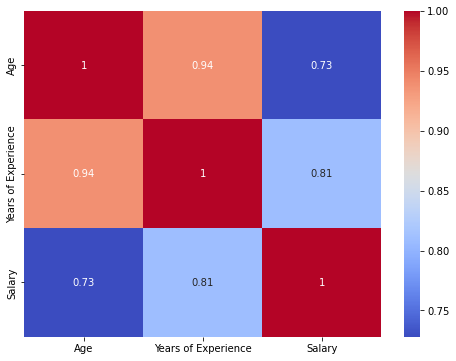

In [12]:
import seaborn as sns
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'Distributions')

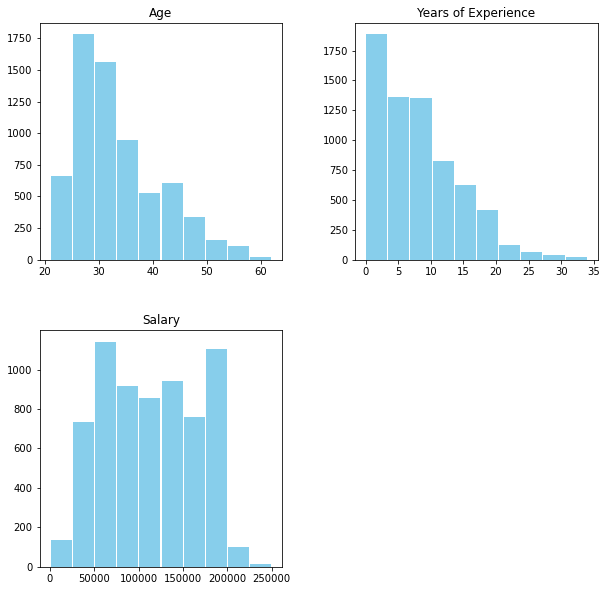

In [13]:
df1.hist(figsize = (10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")

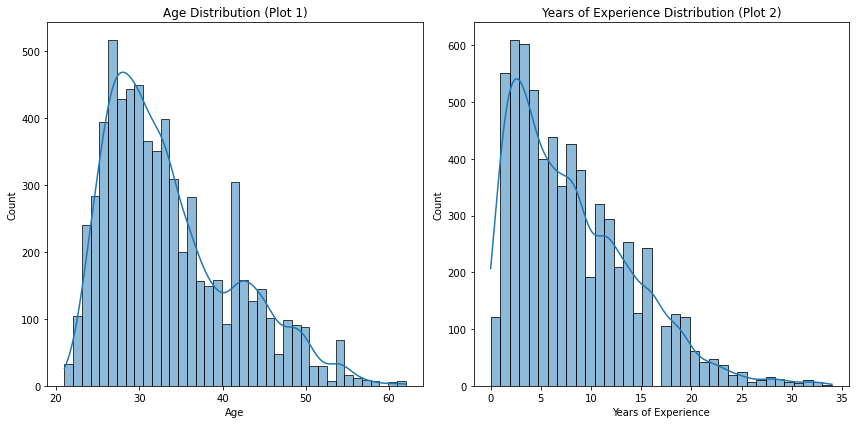

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution (Plot 1)")

sns.histplot(df["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution (Plot 2)")

plt.tight_layout()

plt.show()

### Observations:
 * Age distribution shows us that most people in this dataframe are younger and there are very few older people in the data set. 
 * Years of Experience shows that It is more uniform than Age distribution but the number of less experience employees are more than experts

<a name="l2.4"></a>
## 2.4 Outliers

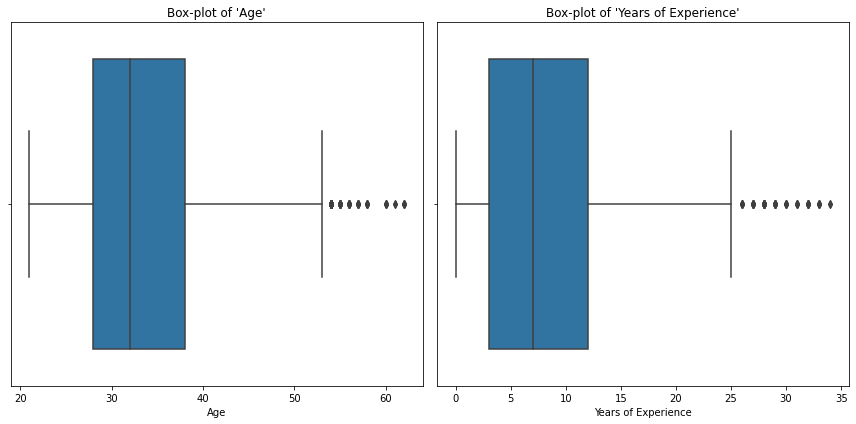

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df1["Age"], ax=axes[0])
axes[0].set_title("Box-plot of 'Age'")

sns.boxplot(x=df1["Years of Experience"], ax=axes[1])
axes[1].set_title("Box-plot of 'Years of Experience'")

plt.tight_layout()

plt.show()

### Observations:
* Due to the Age plot, I can see 8 outliers and in Years Of Expereince plot there are 9 outliers

In [16]:
def outliers(attr):
    Q1 = df1[attr].quantile(0.25)
    Q2 = df1[attr].quantile(0.5)
    Q3 = df1[attr].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return df1[(df1[attr] < lower_bound) | (df1[attr]>upper_bound)]

In [17]:
outliers("Age")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0,UK
1223,57.0,Male,PhD,Software Engineer Manager,18.0,195000.0,China
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0,UK
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0,China
1240,55.0,Male,PhD,Software Engineer Manager,17.0,190000.0,USA
...,...,...,...,...,...,...,...
3058,54.0,Male,Master's Degree,Senior Software Engineer,32.0,195270.0,Canada
3067,54.0,Male,Bachelor's Degree,Full Stack Engineer,25.0,179756.0,UK
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0,China
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia


In [18]:
outliers("Age")["Gender"].value_counts(), outliers("Age")["Job Title"].value_counts()

(Male      92
 Female    27
 Other      4
 Name: Gender, dtype: int64,
 Software Engineer Manager    92
 Full Stack Engineer          13
 Senior Software Engineer     11
 Senior Project Engineer       7
 Name: Job Title, dtype: int64)

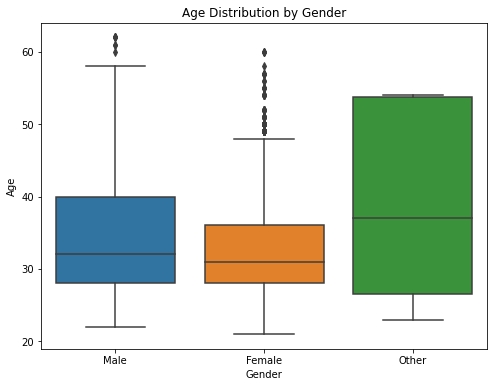

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x="Gender", y="Age")
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.show()

### Observations:
* outliers() function identifed total of 123 outliers in the dataset, most of them are working on computer programming fields like : Software Engineer Manager, Full Stack Engineer or Senior Software Engineer. In addition most of the outliers are male

In [20]:
outliers("Years of Experience")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,Canada
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Australia
2392,52.0,Female,Master's Degree,Senior Software Engineer,28.0,186963.0,Australia
2396,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0,China
2398,58.0,Male,Master's Degree,Senior Software Engineer,27.0,190004.0,China
...,...,...,...,...,...,...,...
3076,52.0,Male,PhD,Software Engineer Manager,26.0,185982.0,Canada
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0,China
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia
3120,54.0,Male,PhD,Software Engineer Manager,28.0,182013.0,USA


<a name="l3"></a>
# 3 Data Cleaning

<a name="l3.1"></a>
## 3.1 Gender

In [21]:
df1 = df1[~(df1["Gender"] == "Other")]
df1["Gender"].unique()

array(['Male', 'Female'], dtype=object)

<a name="l3.2"></a>
## 3.2 Education Level 

In [22]:
df1["Education Level"] = df1["Education Level"].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"])
df1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

<a name="l3.3"></a>
## 3.3 Job Title

In [23]:
df1["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<a name="l3.3.1"></a>
### 3.3.1 Dividing Senior Jobs Title

In [24]:
def Senior(x):
    token = x.split(" ")[0]
    if token == "Senior":
        return 1
    return 0

In [25]:
df1["Senior"] = df1["Job Title"].apply(Senior)
df1.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Senior
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,1


<a name="l3.3.2"></a>
### 3.3.2 Modifying Data

In [26]:
df1["Job Title"] = df1["Job Title"].apply(lambda x: x.replace("Senior ", "")).apply(lambda x: x.replace("Junior ", ""))
len(df1["Job Title"].unique())

129

In [27]:
df1["Country"].value_counts()

USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: Country, dtype: int64

<a name="l3.4"></a>
## 3.4 Encoding

In [71]:
df2 = pd.get_dummies(df1, columns = ["Gender", "Education Level", "Job Title", "Country"])
df2.head()

,Age,Years of Experience,Salary,Senior,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,...,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer,Country_Australia,Country_Canada,Country_China,Country_UK,Country_USA
0,32.0,5.0,90000.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,28.0,3.0,65000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45.0,15.0,150000.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,36.0,7.0,60000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,52.0,20.0,200000.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<a name="l3.5"></a>
## 3.5 Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_need_scaling = ["Age", "Years of Experience"]
df2[columns_need_scaling] = scaler.fit_transform(df2[columns_need_scaling])
df2.head()

,Age,Years of Experience,Salary,Senior,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,...,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer,Country_Australia,Country_Canada,Country_China,Country_UK,Country_USA
0,-0.212044,-0.510499,90000.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.738676,-0.842237,65000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1.499513,1.148191,150000.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.314589,-0.178761,60000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.421120,1.977536,200000.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<a name="l4"></a>
# 4 Visualization

Text(0.5, 1.0, 'Gender Distribution')

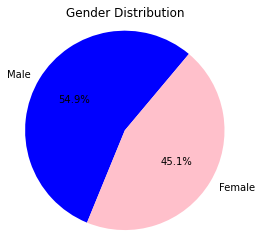

In [73]:
male_count = df2["Gender_Male"].sum()
female_count = df2["Gender_Female"].sum()
labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["blue", 'pink']

plt.figure(figsize = (4, 4))
plt.pie(sizes, labels = labels, colors = colors, startangle = 50, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Gender Distribution")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

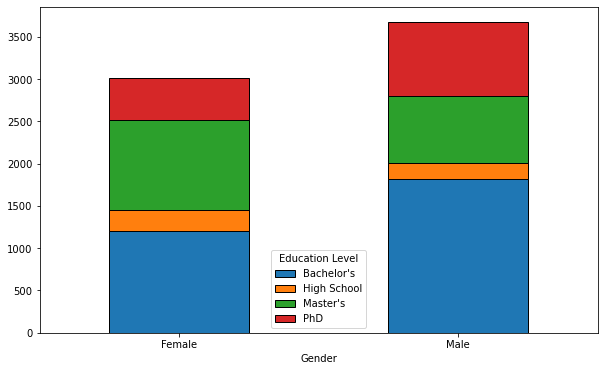

In [74]:
table = pd.crosstab(index = df1["Gender"], columns = df1["Education Level"])
table.plot(kind="bar",figsize = (10, 6), stacked=True, edgecolor = "black")
plt.xticks(rotation = 0)

Text(0, 0.5, 'Salary')

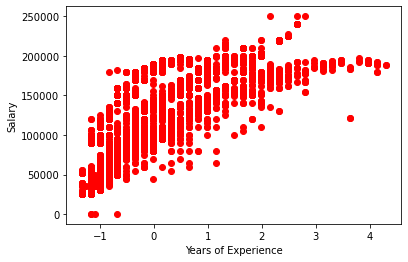

In [75]:
plt.scatter(df2["Years of Experience"], df2["Salary"], color = "red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

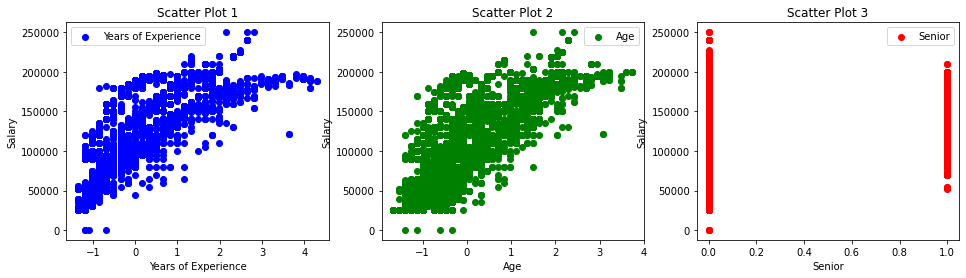

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Scatter plot 1
axs[0].scatter(df2["Years of Experience"], df2["Salary"], label='Years of Experience', color='b')

# Scatter plot 2
axs[1].scatter(df2["Age"], df2["Salary"],label='Age', color='g')

# Scatter plot 3
axs[2].scatter(df2["Senior"], df2["Salary"], label='Senior', color='r')


# Add labels and titles to each subplot
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')
axs[0].set_title('Scatter Plot 1')

axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')
axs[1].set_title('Scatter Plot 2')

axs[2].set_xlabel('Senior')
axs[2].set_ylabel('Salary')
axs[2].set_title('Scatter Plot 3')

# Add legends
axs[0].legend()
axs[1].legend()
axs[2].legend()

<a name="l5"></a>
# 5 Modeling

<a name="l5.1"></a>
## 5.1 Simple Linear Regression

<a name="l5.1.1"></a>
### 5.1.1 Spliting Data

In [77]:
from sklearn.model_selection import train_test_split

X = df2["Years of Experience"]
y = df2["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

train_x = (np.asanyarray(train_x)).reshape(len(train_x), 1)
train_y = (np.asanyarray(train_y)).reshape(len(train_y), 1)

test_x = (np.asanyarray(test_x)).reshape(len(test_x), 1)
test_y = (np.asanyarray(test_y)).reshape(len(test_y), 1)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5347, 1), (1337, 1), (5347, 1), (1337, 1))

<a name="l5.1.2"></a>
### 5.1.2 Learning process

In [78]:
from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()
slr_model.fit(train_x, train_y)
print("Test Error : ", slr_model.score(test_x, test_y), " Train Error : ", slr_model.score(train_x, train_y))
print("Coefficiont : ", slr_model.coef_, " Intercept : ", slr_model.intercept_)

Test Error :  0.6569957598030858  Train Error :  0.6577693032358256
Coefficiont :  [[42959.15273113]]  Intercept :  [115415.54777484]


<a name="l5.1.3"></a>
### 5.1.3 Plotting model

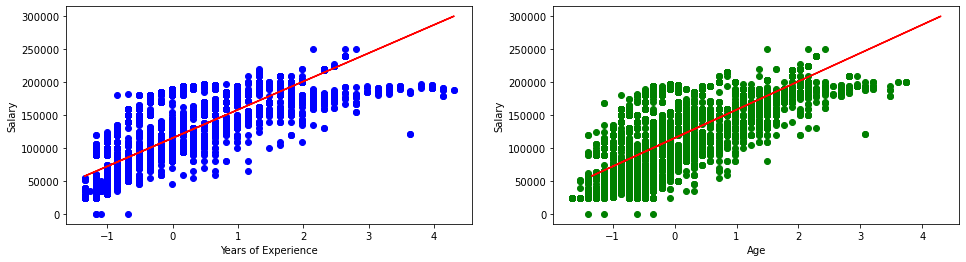

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].scatter(df2["Years of Experience"], df2["Salary"], label='Years of Experience', color='b')
axs[1].scatter(df2["Age"], df2["Salary"],label='Age', color='g')

axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')

axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')

axs[0].plot(train_x, slr_model.coef_[0] * train_x + slr_model.intercept_, "r-")
axs[1].plot(train_x, slr_model.coef_[0] * train_x + slr_model.intercept_, "r-")

<a name="l5.2"></a>
## 5.2 Multi Linear Regression

<a name="l5.2.1"></a>
### 5.2.1 Spliting Data

In [80]:
X = df2[["Years of Experience", "Age"]]
y = df2["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5347, 2), (1337, 2), (5347,), (1337,))

<a name="l5.2.2"></a>
### 5.2.2 Learning Process

In [81]:
mlr_model = LinearRegression()
mlr_model.fit(train_x, train_y)
print("Test Error : ", mlr_model.score(test_x, test_y), " Train Error : ", mlr_model.score(train_x, train_y))
print("Coefficiont : ", mlr_model.coef_, " Intercept : ", mlr_model.intercept_)

Test Error :  0.6667543900563104  Train Error :  0.6659123696135212
Coefficiont :  [ 55775.9834228  -13651.36885084]  Intercept :  115425.84685891207


<a name="l5.3"></a>
## 5.3 Multi-Linear Regression with all the features

<a name="l5.3.1"></a>
## 5.3.1 Spliting Data

In [82]:
X = df2.drop(["Salary"], axis = 1)
y = df2["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5347, 143), (1337, 143), (5347,), (1337,))

<a name="l5.3.2"></a>
## 5.3.2 Learning Process

In [83]:
mlr_model2 = LinearRegression()
mlr_model2.fit(train_x, train_y)
print("Test Error : ", mlr_model2.score(test_x, test_y), " Train Error : ", mlr_model2.score(train_x, train_y))

Test Error :  -2.4733964181065795e+18  Train Error :  0.8241534276619897


<a name="l6"></a>
# 6 Fixing High Variance Problem (Overfitting)

<a name="l6.1"></a>
## 6.1 Dimension Reduction

Using PCA 

In [84]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca_x = pca.fit_transform(X)
pca_x.shape

(6684, 27)

In [85]:
train_x_pca, test_x_pca, train_y_pca, test_y_pca = train_test_split(pca_x, y, test_size = 0.2, random_state = 42)

In [86]:
model_pca = LinearRegression()
model_pca.fit(train_x_pca, train_y_pca)
print("Test Error : ", model_pca.score(test_x_pca, test_y_pca), " Train Error : ", model_pca.score(train_x_pca, train_y_pca))

Test Error :  0.797681793962283  Train Error :  0.7923787914149716


<a name="l6.2"></a>
## 6.2 Regularization

<a name="l6.2.1"></a>
### 6.2.1 L2 Regularization

In [87]:
from sklearn.linear_model import Ridge
l2_model = Ridge()
l2_model.fit(train_x, train_y)
print("Test Error : ", l2_model.score(test_x, test_y), " Train Error : ", l2_model.score(train_x, train_y))

Test Error :  0.8269710676589068  Train Error :  0.8232612264378887


<a name="l6.2.2"></a>
### 6.2.2 L1 Regularization

In [88]:
from sklearn.linear_model import Lasso
l1_model = Lasso()
l1_model.fit(train_x, train_y)
print("Test Error : ", l1_model.score(test_x, test_y), " Train Error : ", l1_model.score(train_x, train_y))

Test Error :  0.8267058289293704  Train Error :  0.8240464448027758


<a name="l7"></a>
# 7 Model Tuning

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
def gridSearch(X, y):
    params = {
        "L2 Reg":{
            "model": Ridge(),
            "param": {
                "alpha": [1, 2],
            }
        },
        "Decision Tree Regression":{
            "model" : DecisionTreeRegressor(),
            "param": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        },
        "Random Forest Regression":{
            "model" : RandomForestRegressor(),
            "param": {
                "n_estimators" : [50, 100],
                "criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
            }
        },
        "Supported Vector Machine Regression":{
            "model" : SVR(),
            "param": {
                "kernel" : ["linear", "poly", "rbf", "sigmoid", "precomputed"],
                "degree" : [1, 2, 3, 5, 10],
                "gamma" : ["scale", "auto"]
            }
        },
        "KNN Regression":{
            "model" : KNeighborsRegressor(),
            "param": {
                "n_neighbors" : [3, 5, 10, 15, 20],
                "weights" : ["uniform", "distance"],
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size" :[5, 10, 30, 50, 100]
            }
        },
        "Gradient Boosting Regression":{
            "model" : GradientBoostingRegressor(),
            "param": {
                "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
                "learning_rate" : [0.1, 0.01, 0.001, 0.005],
                "n_estimators" : [10, 100, 200, 500]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
    for model_name, mp in params.items():
        gsc = RandomizedSearchCV(mp["model"], mp["param"], cv = cv, return_train_score = False).fit(X, y)
        scores.append({
            "model": model_name,
            "best_score" : gsc.best_score_,
            "best_params" : gsc.best_params_
        })
    return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"]) 

In [128]:
# scores = gridSearch(X, y)
# scores
pretrained_scores = pd.read_csv("Evaluation Score.csv")
pretrained_scores.head(6)

,Unnamed: 0,model,best_score,best_params
0,0,L2 Reg,0.521662,{'alpha': 2}
1,1,Decision Tree Regression,0.599380,"{'splitter': 'best', 'criterion': 'friedman_mse'}"
2,2,Random Forest Regression,0.898565,"{'n_estimator': 100, 'criterion': 'friedman_mse'}"
3,3,Supported Vector Machine Regression,0.766891,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2}"
4,4,KNN Regression,0.740195,"{'weights': 'distance', 'n_neighbors': 20, 'le..."
5,5,Gradient Boosting Regression,0.844831,"{'loss': 'squared_error', 'learning_rate': 0.1}"


<a name="l8"></a>
# 8 More Complex Models

<a name="l8.1"></a>
## 8.1 Decision Tree

In [90]:
X = df2.drop(["Salary"], axis = 1)
y = df2["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

dect_model = DecisionTreeRegressor()
dect_model.fit(train_x, train_y)
print("Test Error : ", dect_model.score(test_x, test_y), " Train Error : ", dect_model.score(train_x, train_y))

Test Error :  0.9654274733763234  Train Error :  0.9951591039345721


<a name="l8.2"></a>
## 8.2 Bagging Regressor

In [91]:
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42, oob_score = True).fit(train_x, train_y)
print("Test Error : ", bag_model.score(test_x, test_y), " Train Error : ", bag_model.score(train_x, train_y))

Test Error :  0.9666709903517254  Train Error :  0.9917358515850037


C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


In [92]:
bag_model.oob_score_

0.8962802182145367

In [93]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(bag_model, train_x, train_y, cv = 5).mean())

C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.9700252296713587


C:\Users\amirm\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


<a name="l8.3"></a>
## 8.3 Random Forest

In [94]:
forest_model = RandomForestRegressor().fit(train_x, train_y)
print("Test Error : ", forest_model.score(test_x, test_y), " Train Error : ", forest_model.score(train_x, train_y))

Test Error :  0.9709949747385168  Train Error :  0.9924914532203689


In [62]:
train_x.shape

(5347, 143)

<a name="l8.4"></a>
## 8.4 Gradient Bossting

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
xgboosting_model = GradientBoostingRegressor(random_state=42).fit(train_x, train_y)
print("Test Error : ", xgboosting_model.score(test_x, test_y), " Train Error : ", xgboosting_model.score(train_x, train_y))

Test Error :  0.9064507989232236  Train Error :  0.9110086407240485


<a name="l8.5"></a>
## 8.5 Nueral Network

<a name="l8.5.1"></a>
### 8.5.1 Modeling

In [101]:
from tensorflow.keras import Sequential, layers

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

nn_model = Sequential([
    layers.Input(shape=(143,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
nn_model.compile(optimizer = "adam", loss='mean_squared_error')
nn_model.fit(train_x, train_y, epochs=10000)

Epoch 1/10000
168/168 [==============================] - 1s 969us/step - loss: 16057989120.0000
Epoch 2/10000
168/168 [==============================] - 0s 937us/step - loss: 15503812608.0000
Epoch 3/10000
168/168 [==============================] - 0s 947us/step - loss: 13439735808.0000
Epoch 4/10000
168/168 [==============================] - 0s 964us/step - loss: 9694973952.0000
Epoch 5/10000
168/168 [==============================] - 0s 966us/step - loss: 5456641024.0000
Epoch 6/10000
168/168 [==============================] - 0s 892us/step - loss: 2452659200.0000
Epoch 7/10000
168/168 [==============================] - 0s 910us/step - loss: 1218691840.0000
Epoch 8/10000
168/168 [==============================] - 0s 948us/step - loss: 929567232.0000
Epoch 9/10000
168/168 [==============================] - 0s 908us/step - loss: 852989888.0000
Epoch 10/10000
168/168 [==============================] - 0s 912us/step - loss: 803659008.0000
Epoch 11/10000
168/168 [=========================

168/168 [==============================] - 0s 885us/step - loss: 495925984.0000
Epoch 86/10000
168/168 [==============================] - 0s 876us/step - loss: 495651936.0000
Epoch 87/10000
168/168 [==============================] - 0s 881us/step - loss: 495565504.0000
Epoch 88/10000
168/168 [==============================] - 0s 935us/step - loss: 496001312.0000
Epoch 89/10000
168/168 [==============================] - 0s 888us/step - loss: 495340576.0000
Epoch 90/10000
168/168 [==============================] - 0s 887us/step - loss: 495417440.0000
Epoch 91/10000
168/168 [==============================] - 0s 892us/step - loss: 495598048.0000
Epoch 92/10000
168/168 [==============================] - 0s 894us/step - loss: 495139552.0000
Epoch 93/10000
168/168 [==============================] - 0s 941us/step - loss: 495468448.0000
Epoch 94/10000
168/168 [==============================] - 0s 931us/step - loss: 495134016.0000
Epoch 95/10000
168/168 [==============================] - 0s 939u

168/168 [==============================] - 0s 598us/step - loss: 492972256.0000
Epoch 171/10000
168/168 [==============================] - 0s 485us/step - loss: 492696288.0000
Epoch 172/10000
168/168 [==============================] - 0s 502us/step - loss: 493512128.0000
Epoch 173/10000
168/168 [==============================] - 0s 461us/step - loss: 492670208.0000
Epoch 174/10000
168/168 [==============================] - 0s 504us/step - loss: 492529408.0000
Epoch 175/10000
168/168 [==============================] - 0s 536us/step - loss: 492772960.0000
Epoch 176/10000
168/168 [==============================] - 0s 523us/step - loss: 492375936.0000
Epoch 177/10000
168/168 [==============================] - 0s 461us/step - loss: 493133760.0000
Epoch 178/10000
168/168 [==============================] - 0s 477us/step - loss: 492743456.0000
Epoch 179/10000
168/168 [==============================] - 0s 519us/step - loss: 492602592.0000
Epoch 180/10000
168/168 [==============================]

168/168 [==============================] - 0s 524us/step - loss: 491606592.0000
Epoch 256/10000
168/168 [==============================] - 0s 537us/step - loss: 492194944.0000
Epoch 257/10000
168/168 [==============================] - 0s 524us/step - loss: 491777792.0000
Epoch 258/10000
168/168 [==============================] - 0s 460us/step - loss: 492213024.0000
Epoch 259/10000
168/168 [==============================] - 0s 523us/step - loss: 491963776.0000
Epoch 260/10000
168/168 [==============================] - 0s 522us/step - loss: 492116736.0000
Epoch 261/10000
168/168 [==============================] - 0s 476us/step - loss: 491903616.0000
Epoch 262/10000
168/168 [==============================] - 0s 468us/step - loss: 491596032.0000
Epoch 263/10000
168/168 [==============================] - 0s 523us/step - loss: 491696544.0000
Epoch 264/10000
168/168 [==============================] - 0s 530us/step - loss: 491854496.0000
Epoch 265/10000
168/168 [==============================]

168/168 [==============================] - 0s 592us/step - loss: 491606816.0000
Epoch 341/10000
168/168 [==============================] - 0s 517us/step - loss: 491790272.0000
Epoch 342/10000
168/168 [==============================] - 0s 501us/step - loss: 491567552.0000
Epoch 343/10000
168/168 [==============================] - 0s 597us/step - loss: 491662016.0000
Epoch 344/10000
168/168 [==============================] - 0s 499us/step - loss: 491873280.0000
Epoch 345/10000
168/168 [==============================] - 0s 594us/step - loss: 491516032.0000
Epoch 346/10000
168/168 [==============================] - 0s 534us/step - loss: 491230240.0000
Epoch 347/10000
168/168 [==============================] - 0s 510us/step - loss: 492082688.0000
Epoch 348/10000
168/168 [==============================] - 0s 474us/step - loss: 491546656.0000
Epoch 349/10000
168/168 [==============================] - 0s 540us/step - loss: 491604704.0000
Epoch 350/10000
168/168 [==============================]

168/168 [==============================] - 0s 499us/step - loss: 491634336.0000
Epoch 426/10000
168/168 [==============================] - 0s 498us/step - loss: 492197504.0000
Epoch 427/10000
168/168 [==============================] - 0s 594us/step - loss: 491713856.0000
Epoch 428/10000
168/168 [==============================] - 0s 503us/step - loss: 491320224.0000
Epoch 429/10000
168/168 [==============================] - 0s 593us/step - loss: 491666976.0000
Epoch 430/10000
168/168 [==============================] - 0s 577us/step - loss: 491374336.0000
Epoch 431/10000
168/168 [==============================] - 0s 460us/step - loss: 491575488.0000
Epoch 432/10000
168/168 [==============================] - 0s 592us/step - loss: 491575936.0000
Epoch 433/10000
168/168 [==============================] - 0s 504us/step - loss: 491505056.0000
Epoch 434/10000
168/168 [==============================] - 0s 527us/step - loss: 491748512.0000
Epoch 435/10000
168/168 [==============================]

168/168 [==============================] - 0s 539us/step - loss: 491489760.0000
Epoch 511/10000
168/168 [==============================] - 0s 530us/step - loss: 491315968.0000
Epoch 512/10000
168/168 [==============================] - 0s 534us/step - loss: 491285856.0000
Epoch 513/10000
168/168 [==============================] - 0s 536us/step - loss: 491272160.0000
Epoch 514/10000
168/168 [==============================] - 0s 524us/step - loss: 491672320.0000
Epoch 515/10000
168/168 [==============================] - 0s 555us/step - loss: 491473312.0000
Epoch 516/10000
168/168 [==============================] - 0s 606us/step - loss: 491540256.0000
Epoch 517/10000
168/168 [==============================] - 0s 500us/step - loss: 491384192.0000
Epoch 518/10000
168/168 [==============================] - 0s 501us/step - loss: 491549024.0000
Epoch 519/10000
168/168 [==============================] - 0s 501us/step - loss: 491093088.0000
Epoch 520/10000
168/168 [==============================]

168/168 [==============================] - 0s 467us/step - loss: 490358720.0000
Epoch 596/10000
168/168 [==============================] - 0s 524us/step - loss: 490063584.0000
Epoch 597/10000
168/168 [==============================] - 0s 536us/step - loss: 490756704.0000
Epoch 598/10000
168/168 [==============================] - 0s 454us/step - loss: 489863296.0000
Epoch 599/10000
168/168 [==============================] - 0s 465us/step - loss: 490236448.0000
Epoch 600/10000
168/168 [==============================] - 0s 473us/step - loss: 489347872.0000
Epoch 601/10000
168/168 [==============================] - 0s 504us/step - loss: 489826592.0000
Epoch 602/10000
168/168 [==============================] - 0s 523us/step - loss: 489614944.0000
Epoch 603/10000
168/168 [==============================] - 0s 508us/step - loss: 489453888.0000
Epoch 604/10000
168/168 [==============================] - 0s 466us/step - loss: 489481984.0000
Epoch 605/10000
168/168 [==============================]

168/168 [==============================] - 0s 541us/step - loss: 353705536.0000
Epoch 681/10000
168/168 [==============================] - 0s 468us/step - loss: 351695360.0000
Epoch 682/10000
168/168 [==============================] - 0s 462us/step - loss: 350064416.0000
Epoch 683/10000
168/168 [==============================] - 0s 592us/step - loss: 348795936.0000
Epoch 684/10000
168/168 [==============================] - 0s 466us/step - loss: 347174592.0000
Epoch 685/10000
168/168 [==============================] - 0s 525us/step - loss: 345720352.0000
Epoch 686/10000
168/168 [==============================] - 0s 548us/step - loss: 343668608.0000
Epoch 687/10000
168/168 [==============================] - 0s 484us/step - loss: 342352096.0000
Epoch 688/10000
168/168 [==============================] - 0s 498us/step - loss: 341197856.0000
Epoch 689/10000
168/168 [==============================] - 0s 530us/step - loss: 339564768.0000
Epoch 690/10000
168/168 [==============================]

168/168 [==============================] - 0s 591us/step - loss: 283334720.0000
Epoch 766/10000
168/168 [==============================] - 0s 554us/step - loss: 282740896.0000
Epoch 767/10000
168/168 [==============================] - 0s 498us/step - loss: 282219008.0000
Epoch 768/10000
168/168 [==============================] - 0s 592us/step - loss: 281865184.0000
Epoch 769/10000
168/168 [==============================] - 0s 553us/step - loss: 281867296.0000
Epoch 770/10000
168/168 [==============================] - 0s 552us/step - loss: 281634912.0000
Epoch 771/10000
168/168 [==============================] - 0s 522us/step - loss: 280599072.0000
Epoch 772/10000
168/168 [==============================] - 0s 470us/step - loss: 280953984.0000
Epoch 773/10000
168/168 [==============================] - 0s 548us/step - loss: 280449248.0000
Epoch 774/10000
168/168 [==============================] - 0s 548us/step - loss: 280533792.0000
Epoch 775/10000
168/168 [==============================]

168/168 [==============================] - 0s 548us/step - loss: 262014640.0000
Epoch 851/10000
168/168 [==============================] - 0s 471us/step - loss: 261772256.0000
Epoch 852/10000
168/168 [==============================] - 0s 531us/step - loss: 261409088.0000
Epoch 853/10000
168/168 [==============================] - 0s 514us/step - loss: 261132272.0000
Epoch 854/10000
168/168 [==============================] - 0s 467us/step - loss: 260875904.0000
Epoch 855/10000
168/168 [==============================] - 0s 563us/step - loss: 260398784.0000
Epoch 856/10000
168/168 [==============================] - 0s 540us/step - loss: 260378240.0000
Epoch 857/10000
168/168 [==============================] - 0s 530us/step - loss: 260075472.0000
Epoch 858/10000
168/168 [==============================] - 0s 460us/step - loss: 259962128.0000
Epoch 859/10000
168/168 [==============================] - 0s 592us/step - loss: 259764512.0000
Epoch 860/10000
168/168 [==============================]

168/168 [==============================] - 0s 554us/step - loss: 236960480.0000
Epoch 936/10000
168/168 [==============================] - 0s 545us/step - loss: 236815280.0000
Epoch 937/10000
168/168 [==============================] - 0s 476us/step - loss: 236317920.0000
Epoch 938/10000
168/168 [==============================] - 0s 548us/step - loss: 236310224.0000
Epoch 939/10000
168/168 [==============================] - 0s 548us/step - loss: 236060160.0000
Epoch 940/10000
168/168 [==============================] - 0s 592us/step - loss: 235859792.0000
Epoch 941/10000
168/168 [==============================] - 0s 504us/step - loss: 235468432.0000
Epoch 942/10000
168/168 [==============================] - 0s 470us/step - loss: 235007264.0000
Epoch 943/10000
168/168 [==============================] - 0s 542us/step - loss: 234811872.0000
Epoch 944/10000
168/168 [==============================] - 0s 471us/step - loss: 234850608.0000
Epoch 945/10000
168/168 [==============================]

168/168 [==============================] - 0s 505us/step - loss: 220389312.0000
Epoch 1021/10000
168/168 [==============================] - 0s 548us/step - loss: 220490480.0000
Epoch 1022/10000
168/168 [==============================] - 0s 536us/step - loss: 220090768.0000
Epoch 1023/10000
168/168 [==============================] - 0s 554us/step - loss: 220064944.0000
Epoch 1024/10000
168/168 [==============================] - 0s 480us/step - loss: 219908304.0000
Epoch 1025/10000
168/168 [==============================] - 0s 592us/step - loss: 219592080.0000
Epoch 1026/10000
168/168 [==============================] - 0s 545us/step - loss: 219441344.0000
Epoch 1027/10000
168/168 [==============================] - 0s 537us/step - loss: 219066608.0000
Epoch 1028/10000
168/168 [==============================] - 0s 548us/step - loss: 218868112.0000
Epoch 1029/10000
168/168 [==============================] - 0s 551us/step - loss: 218662416.0000
Epoch 1030/10000
168/168 [=====================

168/168 [==============================] - 0s 467us/step - loss: 205932896.0000
Epoch 1105/10000
168/168 [==============================] - 0s 659us/step - loss: 205925024.0000
Epoch 1106/10000
168/168 [==============================] - 0s 579us/step - loss: 205414096.0000
Epoch 1107/10000
168/168 [==============================] - 0s 560us/step - loss: 205482048.0000
Epoch 1108/10000
168/168 [==============================] - 0s 542us/step - loss: 205306720.0000
Epoch 1109/10000
168/168 [==============================] - 0s 522us/step - loss: 204966880.0000
Epoch 1110/10000
168/168 [==============================] - 0s 541us/step - loss: 204829456.0000
Epoch 1111/10000
168/168 [==============================] - 0s 538us/step - loss: 204784352.0000
Epoch 1112/10000
168/168 [==============================] - 0s 454us/step - loss: 204417984.0000
Epoch 1113/10000
168/168 [==============================] - 0s 592us/step - loss: 204480000.0000
Epoch 1114/10000
168/168 [=====================

168/168 [==============================] - 0s 498us/step - loss: 190010912.0000
Epoch 1189/10000
168/168 [==============================] - 0s 460us/step - loss: 189773952.0000
Epoch 1190/10000
168/168 [==============================] - 0s 504us/step - loss: 189484352.0000
Epoch 1191/10000
168/168 [==============================] - 0s 549us/step - loss: 189308640.0000
Epoch 1192/10000
168/168 [==============================] - 0s 548us/step - loss: 189361712.0000
Epoch 1193/10000
168/168 [==============================] - 0s 532us/step - loss: 189129936.0000
Epoch 1194/10000
168/168 [==============================] - 0s 545us/step - loss: 188977920.0000
Epoch 1195/10000
168/168 [==============================] - 0s 539us/step - loss: 188476368.0000
Epoch 1196/10000
168/168 [==============================] - 0s 528us/step - loss: 188462464.0000
Epoch 1197/10000
168/168 [==============================] - 0s 536us/step - loss: 188186672.0000
Epoch 1198/10000
168/168 [=====================

168/168 [==============================] - 0s 499us/step - loss: 174003104.0000
Epoch 1273/10000
168/168 [==============================] - 0s 507us/step - loss: 174236240.0000
Epoch 1274/10000
168/168 [==============================] - 0s 498us/step - loss: 173552128.0000
Epoch 1275/10000
168/168 [==============================] - 0s 545us/step - loss: 173825584.0000
Epoch 1276/10000
168/168 [==============================] - 0s 535us/step - loss: 172927264.0000
Epoch 1277/10000
168/168 [==============================] - 0s 468us/step - loss: 173141808.0000
Epoch 1278/10000
168/168 [==============================] - 0s 556us/step - loss: 173076208.0000
Epoch 1279/10000
168/168 [==============================] - 0s 535us/step - loss: 172641632.0000
Epoch 1280/10000
168/168 [==============================] - 0s 548us/step - loss: 172665200.0000
Epoch 1281/10000
168/168 [==============================] - 0s 540us/step - loss: 172555072.0000
Epoch 1282/10000
168/168 [=====================

168/168 [==============================] - 0s 544us/step - loss: 161873664.0000
Epoch 1357/10000
168/168 [==============================] - 0s 635us/step - loss: 162222944.0000
Epoch 1358/10000
168/168 [==============================] - 0s 551us/step - loss: 162113776.0000
Epoch 1359/10000
168/168 [==============================] - 0s 545us/step - loss: 161774048.0000
Epoch 1360/10000
168/168 [==============================] - 0s 539us/step - loss: 161917856.0000
Epoch 1361/10000
168/168 [==============================] - 0s 533us/step - loss: 161562688.0000
Epoch 1362/10000
168/168 [==============================] - 0s 536us/step - loss: 161515296.0000
Epoch 1363/10000
168/168 [==============================] - 0s 547us/step - loss: 161403200.0000
Epoch 1364/10000
168/168 [==============================] - 0s 548us/step - loss: 161211552.0000
Epoch 1365/10000
168/168 [==============================] - 0s 534us/step - loss: 161229488.0000
Epoch 1366/10000
168/168 [=====================

168/168 [==============================] - 0s 508us/step - loss: 153086576.0000
Epoch 1441/10000
168/168 [==============================] - 0s 563us/step - loss: 153110512.0000
Epoch 1442/10000
168/168 [==============================] - 0s 460us/step - loss: 153123264.0000
Epoch 1443/10000
168/168 [==============================] - 0s 529us/step - loss: 152828000.0000
Epoch 1444/10000
168/168 [==============================] - 0s 460us/step - loss: 152955088.0000
Epoch 1445/10000
168/168 [==============================] - 0s 463us/step - loss: 152755376.0000
Epoch 1446/10000
168/168 [==============================] - 0s 530us/step - loss: 152580656.0000
Epoch 1447/10000
168/168 [==============================] - 0s 454us/step - loss: 152388464.0000
Epoch 1448/10000
168/168 [==============================] - 0s 546us/step - loss: 152453808.0000
Epoch 1449/10000
168/168 [==============================] - 0s 503us/step - loss: 152240144.0000
Epoch 1450/10000
168/168 [=====================

168/168 [==============================] - 0s 459us/step - loss: 143587520.0000
Epoch 1525/10000
168/168 [==============================] - 0s 553us/step - loss: 143235680.0000
Epoch 1526/10000
168/168 [==============================] - 0s 543us/step - loss: 143411968.0000
Epoch 1527/10000
168/168 [==============================] - 0s 597us/step - loss: 143083008.0000
Epoch 1528/10000
168/168 [==============================] - 0s 598us/step - loss: 142956912.0000
Epoch 1529/10000
168/168 [==============================] - 0s 527us/step - loss: 142894208.0000
Epoch 1530/10000
168/168 [==============================] - 0s 509us/step - loss: 142814752.0000
Epoch 1531/10000
168/168 [==============================] - 0s 532us/step - loss: 142651984.0000
Epoch 1532/10000
168/168 [==============================] - 0s 559us/step - loss: 142481360.0000
Epoch 1533/10000
168/168 [==============================] - 0s 503us/step - loss: 142897760.0000
Epoch 1534/10000
168/168 [=====================

168/168 [==============================] - 0s 647us/step - loss: 136146768.0000
Epoch 1609/10000
168/168 [==============================] - 0s 482us/step - loss: 136029408.0000
Epoch 1610/10000
168/168 [==============================] - 0s 553us/step - loss: 135776400.0000
Epoch 1611/10000
168/168 [==============================] - 0s 592us/step - loss: 135767696.0000
Epoch 1612/10000
168/168 [==============================] - 0s 568us/step - loss: 135987184.0000
Epoch 1613/10000
168/168 [==============================] - 0s 523us/step - loss: 135649840.0000
Epoch 1614/10000
168/168 [==============================] - 0s 543us/step - loss: 135884368.0000
Epoch 1615/10000
168/168 [==============================] - 0s 550us/step - loss: 135651792.0000
Epoch 1616/10000
168/168 [==============================] - 0s 581us/step - loss: 135360528.0000
Epoch 1617/10000
168/168 [==============================] - 0s 550us/step - loss: 135651408.0000
Epoch 1618/10000
168/168 [=====================

168/168 [==============================] - 0s 473us/step - loss: 130948304.0000
Epoch 1693/10000
168/168 [==============================] - 0s 597us/step - loss: 130963336.0000
Epoch 1694/10000
168/168 [==============================] - 0s 560us/step - loss: 130948992.0000
Epoch 1695/10000
168/168 [==============================] - 0s 528us/step - loss: 130542928.0000
Epoch 1696/10000
168/168 [==============================] - 0s 498us/step - loss: 130725872.0000
Epoch 1697/10000
168/168 [==============================] - 0s 592us/step - loss: 130494728.0000
Epoch 1698/10000
168/168 [==============================] - 0s 566us/step - loss: 130571008.0000
Epoch 1699/10000
168/168 [==============================] - 0s 472us/step - loss: 130217360.0000
Epoch 1700/10000
168/168 [==============================] - 0s 548us/step - loss: 130170048.0000
Epoch 1701/10000
168/168 [==============================] - 0s 551us/step - loss: 130177248.0000
Epoch 1702/10000
168/168 [=====================

168/168 [==============================] - 0s 597us/step - loss: 126483992.0000
Epoch 1777/10000
168/168 [==============================] - 0s 478us/step - loss: 126491120.0000
Epoch 1778/10000
168/168 [==============================] - 0s 525us/step - loss: 126267160.0000
Epoch 1779/10000
168/168 [==============================] - 0s 542us/step - loss: 126120360.0000
Epoch 1780/10000
168/168 [==============================] - 0s 551us/step - loss: 125892624.0000
Epoch 1781/10000
168/168 [==============================] - 0s 517us/step - loss: 125989280.0000
Epoch 1782/10000
168/168 [==============================] - 0s 541us/step - loss: 125933216.0000
Epoch 1783/10000
168/168 [==============================] - 0s 542us/step - loss: 126150392.0000
Epoch 1784/10000
168/168 [==============================] - 0s 548us/step - loss: 125660736.0000
Epoch 1785/10000
168/168 [==============================] - 0s 548us/step - loss: 125819560.0000
Epoch 1786/10000
168/168 [=====================

168/168 [==============================] - 0s 549us/step - loss: 123098720.0000
Epoch 1861/10000
168/168 [==============================] - 0s 541us/step - loss: 123024968.0000
Epoch 1862/10000
168/168 [==============================] - 0s 542us/step - loss: 122957312.0000
Epoch 1863/10000
168/168 [==============================] - 0s 536us/step - loss: 122756616.0000
Epoch 1864/10000
168/168 [==============================] - 0s 455us/step - loss: 122661096.0000
Epoch 1865/10000
168/168 [==============================] - 0s 542us/step - loss: 122989696.0000
Epoch 1866/10000
168/168 [==============================] - 0s 542us/step - loss: 122798712.0000
Epoch 1867/10000
168/168 [==============================] - 0s 489us/step - loss: 122710896.0000
Epoch 1868/10000
168/168 [==============================] - 0s 538us/step - loss: 122592464.0000
Epoch 1869/10000
168/168 [==============================] - 0s 599us/step - loss: 122674384.0000
Epoch 1870/10000
168/168 [=====================

168/168 [==============================] - 0s 536us/step - loss: 120142040.0000
Epoch 1945/10000
168/168 [==============================] - 0s 540us/step - loss: 120234136.0000
Epoch 1946/10000
168/168 [==============================] - 0s 541us/step - loss: 119956560.0000
Epoch 1947/10000
168/168 [==============================] - 0s 542us/step - loss: 120029272.0000
Epoch 1948/10000
168/168 [==============================] - 0s 580us/step - loss: 120153200.0000
Epoch 1949/10000
168/168 [==============================] - 0s 581us/step - loss: 120102432.0000
Epoch 1950/10000
168/168 [==============================] - 0s 544us/step - loss: 119863480.0000
Epoch 1951/10000
168/168 [==============================] - 0s 562us/step - loss: 119860872.0000
Epoch 1952/10000
168/168 [==============================] - 0s 479us/step - loss: 119815768.0000
Epoch 1953/10000
168/168 [==============================] - 0s 592us/step - loss: 119799232.0000
Epoch 1954/10000
168/168 [=====================

168/168 [==============================] - 0s 548us/step - loss: 118091144.0000
Epoch 2029/10000
168/168 [==============================] - 0s 535us/step - loss: 117931096.0000
Epoch 2030/10000
168/168 [==============================] - 0s 472us/step - loss: 117889216.0000
Epoch 2031/10000
168/168 [==============================] - 0s 592us/step - loss: 118377280.0000
Epoch 2032/10000
168/168 [==============================] - 0s 544us/step - loss: 117840552.0000
Epoch 2033/10000
168/168 [==============================] - 0s 492us/step - loss: 117831496.0000
Epoch 2034/10000
168/168 [==============================] - 0s 548us/step - loss: 117930576.0000
Epoch 2035/10000
168/168 [==============================] - 0s 542us/step - loss: 117683720.0000
Epoch 2036/10000
168/168 [==============================] - 0s 534us/step - loss: 118009288.0000
Epoch 2037/10000
168/168 [==============================] - 0s 538us/step - loss: 117657960.0000
Epoch 2038/10000
168/168 [=====================

168/168 [==============================] - 0s 554us/step - loss: 116094640.0000
Epoch 2113/10000
168/168 [==============================] - 0s 592us/step - loss: 115939104.0000
Epoch 2114/10000
168/168 [==============================] - 0s 542us/step - loss: 115803128.0000
Epoch 2115/10000
168/168 [==============================] - 0s 541us/step - loss: 115836048.0000
Epoch 2116/10000
168/168 [==============================] - 0s 528us/step - loss: 115882256.0000
Epoch 2117/10000
168/168 [==============================] - 0s 503us/step - loss: 115950880.0000
Epoch 2118/10000
168/168 [==============================] - 0s 550us/step - loss: 115873056.0000
Epoch 2119/10000
168/168 [==============================] - 0s 543us/step - loss: 115989432.0000
Epoch 2120/10000
168/168 [==============================] - 0s 541us/step - loss: 115742104.0000
Epoch 2121/10000
168/168 [==============================] - 0s 546us/step - loss: 116057480.0000
Epoch 2122/10000
168/168 [=====================

168/168 [==============================] - 0s 539us/step - loss: 114234712.0000
Epoch 2197/10000
168/168 [==============================] - 0s 552us/step - loss: 114397528.0000
Epoch 2198/10000
168/168 [==============================] - 0s 531us/step - loss: 114031184.0000
Epoch 2199/10000
168/168 [==============================] - 0s 526us/step - loss: 113888504.0000
Epoch 2200/10000
168/168 [==============================] - 0s 509us/step - loss: 114116840.0000
Epoch 2201/10000
168/168 [==============================] - 0s 504us/step - loss: 114131432.0000
Epoch 2202/10000
168/168 [==============================] - 0s 493us/step - loss: 114063992.0000
Epoch 2203/10000
168/168 [==============================] - 0s 600us/step - loss: 113893176.0000
Epoch 2204/10000
168/168 [==============================] - 0s 568us/step - loss: 114041832.0000
Epoch 2205/10000
168/168 [==============================] - 0s 530us/step - loss: 114025888.0000
Epoch 2206/10000
168/168 [=====================

168/168 [==============================] - 0s 492us/step - loss: 112027352.0000
Epoch 2281/10000
168/168 [==============================] - 0s 467us/step - loss: 112130224.0000
Epoch 2282/10000
168/168 [==============================] - 0s 555us/step - loss: 112058312.0000
Epoch 2283/10000
168/168 [==============================] - 0s 545us/step - loss: 111963336.0000
Epoch 2284/10000
168/168 [==============================] - 0s 550us/step - loss: 111961248.0000
Epoch 2285/10000
168/168 [==============================] - 0s 560us/step - loss: 112137112.0000
Epoch 2286/10000
168/168 [==============================] - 0s 535us/step - loss: 112072504.0000
Epoch 2287/10000
168/168 [==============================] - 0s 540us/step - loss: 111760192.0000
Epoch 2288/10000
168/168 [==============================] - 0s 563us/step - loss: 111467056.0000
Epoch 2289/10000
168/168 [==============================] - 0s 524us/step - loss: 111652816.0000
Epoch 2290/10000
168/168 [=====================

168/168 [==============================] - 0s 551us/step - loss: 108989128.0000
Epoch 2365/10000
168/168 [==============================] - 0s 546us/step - loss: 108902768.0000
Epoch 2366/10000
168/168 [==============================] - 0s 548us/step - loss: 109247872.0000
Epoch 2367/10000
168/168 [==============================] - 0s 551us/step - loss: 108967416.0000
Epoch 2368/10000
168/168 [==============================] - 0s 471us/step - loss: 109096736.0000
Epoch 2369/10000
168/168 [==============================] - 0s 480us/step - loss: 109257888.0000
Epoch 2370/10000
168/168 [==============================] - 0s 545us/step - loss: 108864424.0000
Epoch 2371/10000
168/168 [==============================] - 0s 498us/step - loss: 108942736.0000
Epoch 2372/10000
168/168 [==============================] - 0s 537us/step - loss: 108872704.0000
Epoch 2373/10000
168/168 [==============================] - 0s 585us/step - loss: 108889800.0000
Epoch 2374/10000
168/168 [=====================

168/168 [==============================] - 0s 599us/step - loss: 106929320.0000
Epoch 2449/10000
168/168 [==============================] - 0s 498us/step - loss: 106719832.0000
Epoch 2450/10000
168/168 [==============================] - 0s 515us/step - loss: 106713312.0000
Epoch 2451/10000
168/168 [==============================] - 0s 538us/step - loss: 106794080.0000
Epoch 2452/10000
168/168 [==============================] - 0s 498us/step - loss: 106653880.0000
Epoch 2453/10000
168/168 [==============================] - 0s 537us/step - loss: 106773896.0000
Epoch 2454/10000
168/168 [==============================] - 0s 544us/step - loss: 106666848.0000
Epoch 2455/10000
168/168 [==============================] - 0s 540us/step - loss: 106654144.0000
Epoch 2456/10000
168/168 [==============================] - 0s 552us/step - loss: 106522168.0000
Epoch 2457/10000
168/168 [==============================] - 0s 466us/step - loss: 106565816.0000
Epoch 2458/10000
168/168 [=====================

168/168 [==============================] - 0s 490us/step - loss: 104056144.0000
Epoch 2533/10000
168/168 [==============================] - 0s 600us/step - loss: 104285832.0000
Epoch 2534/10000
168/168 [==============================] - 0s 595us/step - loss: 103997024.0000
Epoch 2535/10000
168/168 [==============================] - 0s 504us/step - loss: 103844888.0000
Epoch 2536/10000
168/168 [==============================] - 0s 537us/step - loss: 103815320.0000
Epoch 2537/10000
168/168 [==============================] - 0s 466us/step - loss: 104083144.0000
Epoch 2538/10000
168/168 [==============================] - 0s 592us/step - loss: 103772424.0000
Epoch 2539/10000
168/168 [==============================] - 0s 503us/step - loss: 103698960.0000
Epoch 2540/10000
168/168 [==============================] - 0s 496us/step - loss: 103631264.0000
Epoch 2541/10000
168/168 [==============================] - 0s 548us/step - loss: 103690112.0000
Epoch 2542/10000
168/168 [=====================

168/168 [==============================] - 0s 529us/step - loss: 101629824.0000
Epoch 2617/10000
168/168 [==============================] - 0s 548us/step - loss: 101495192.0000
Epoch 2618/10000
168/168 [==============================] - 0s 542us/step - loss: 101582712.0000
Epoch 2619/10000
168/168 [==============================] - 0s 555us/step - loss: 101797288.0000
Epoch 2620/10000
168/168 [==============================] - 0s 479us/step - loss: 101497152.0000
Epoch 2621/10000
168/168 [==============================] - 0s 548us/step - loss: 101597136.0000
Epoch 2622/10000
168/168 [==============================] - 0s 581us/step - loss: 101829432.0000
Epoch 2623/10000
168/168 [==============================] - 0s 515us/step - loss: 101418712.0000
Epoch 2624/10000
168/168 [==============================] - 0s 548us/step - loss: 101406072.0000
Epoch 2625/10000
168/168 [==============================] - 0s 458us/step - loss: 101359624.0000
Epoch 2626/10000
168/168 [=====================

168/168 [==============================] - 0s 538us/step - loss: 99590608.0000
Epoch 2701/10000
168/168 [==============================] - 0s 504us/step - loss: 99558112.0000
Epoch 2702/10000
168/168 [==============================] - 0s 498us/step - loss: 99656792.0000
Epoch 2703/10000
168/168 [==============================] - 0s 497us/step - loss: 99887736.0000
Epoch 2704/10000
168/168 [==============================] - 0s 549us/step - loss: 99545920.0000
Epoch 2705/10000
168/168 [==============================] - 0s 530us/step - loss: 99401392.0000
Epoch 2706/10000
168/168 [==============================] - 0s 509us/step - loss: 99380328.0000
Epoch 2707/10000
168/168 [==============================] - 0s 592us/step - loss: 99579504.0000
Epoch 2708/10000
168/168 [==============================] - 0s 507us/step - loss: 99355896.0000
Epoch 2709/10000
168/168 [==============================] - 0s 507us/step - loss: 99360680.0000
Epoch 2710/10000
168/168 [==============================]

168/168 [==============================] - 0s 539us/step - loss: 97900216.0000
Epoch 2786/10000
168/168 [==============================] - 0s 530us/step - loss: 97727888.0000
Epoch 2787/10000
168/168 [==============================] - 0s 547us/step - loss: 97589768.0000
Epoch 2788/10000
168/168 [==============================] - 0s 505us/step - loss: 97713144.0000
Epoch 2789/10000
168/168 [==============================] - 0s 636us/step - loss: 97745880.0000
Epoch 2790/10000
168/168 [==============================] - 0s 486us/step - loss: 97470400.0000
Epoch 2791/10000
168/168 [==============================] - 0s 503us/step - loss: 97662824.0000
Epoch 2792/10000
168/168 [==============================] - 0s 536us/step - loss: 97431880.0000
Epoch 2793/10000
168/168 [==============================] - 0s 542us/step - loss: 97616768.0000
Epoch 2794/10000
168/168 [==============================] - 0s 548us/step - loss: 97552920.0000
Epoch 2795/10000
168/168 [==============================]

168/168 [==============================] - 0s 547us/step - loss: 95915416.0000
Epoch 2871/10000
168/168 [==============================] - 0s 536us/step - loss: 95990352.0000
Epoch 2872/10000
168/168 [==============================] - 0s 558us/step - loss: 96143944.0000
Epoch 2873/10000
168/168 [==============================] - 0s 498us/step - loss: 96033016.0000
Epoch 2874/10000
168/168 [==============================] - 0s 540us/step - loss: 95931648.0000
Epoch 2875/10000
168/168 [==============================] - 0s 529us/step - loss: 95824104.0000
Epoch 2876/10000
168/168 [==============================] - 0s 501us/step - loss: 95698528.0000
Epoch 2877/10000
168/168 [==============================] - ETA: 0s - loss: 100330560.000 - 0s 557us/step - loss: 96026208.0000
Epoch 2878/10000
168/168 [==============================] - 0s 534us/step - loss: 95824008.0000
Epoch 2879/10000
168/168 [==============================] - 0s 462us/step - loss: 95768432.0000
Epoch 2880/10000
168/168 

168/168 [==============================] - 0s 485us/step - loss: 94461816.0000
Epoch 2955/10000
168/168 [==============================] - 0s 543us/step - loss: 94507752.0000
Epoch 2956/10000
168/168 [==============================] - 0s 548us/step - loss: 94451232.0000
Epoch 2957/10000
168/168 [==============================] - 0s 566us/step - loss: 94312064.0000
Epoch 2958/10000
168/168 [==============================] - 0s 560us/step - loss: 94237768.0000
Epoch 2959/10000
168/168 [==============================] - 0s 538us/step - loss: 94223792.0000
Epoch 2960/10000
168/168 [==============================] - 0s 537us/step - loss: 94166576.0000
Epoch 2961/10000
168/168 [==============================] - 0s 536us/step - loss: 94172720.0000
Epoch 2962/10000
168/168 [==============================] - 0s 494us/step - loss: 94442920.0000
Epoch 2963/10000
168/168 [==============================] - 0s 530us/step - loss: 94168928.0000
Epoch 2964/10000
168/168 [==============================]

168/168 [==============================] - 0s 581us/step - loss: 92673864.0000
Epoch 3040/10000
168/168 [==============================] - 0s 479us/step - loss: 92617064.0000
Epoch 3041/10000
168/168 [==============================] - 0s 756us/step - loss: 92654848.0000
Epoch 3042/10000
168/168 [==============================] - 0s 531us/step - loss: 92655040.0000
Epoch 3043/10000
168/168 [==============================] - 0s 548us/step - loss: 92700712.0000
Epoch 3044/10000
168/168 [==============================] - 0s 670us/step - loss: 92600208.0000
Epoch 3045/10000
168/168 [==============================] - 0s 549us/step - loss: 92496584.0000
Epoch 3046/10000
168/168 [==============================] - 0s 548us/step - loss: 92704072.0000
Epoch 3047/10000
168/168 [==============================] - 0s 523us/step - loss: 92557616.0000
Epoch 3048/10000
168/168 [==============================] - 0s 519us/step - loss: 92477168.0000
Epoch 3049/10000
168/168 [==============================]

168/168 [==============================] - 0s 494us/step - loss: 91188992.0000
Epoch 3125/10000
168/168 [==============================] - 0s 569us/step - loss: 91060936.0000
Epoch 3126/10000
168/168 [==============================] - 0s 503us/step - loss: 91035520.0000
Epoch 3127/10000
168/168 [==============================] - 0s 548us/step - loss: 90872616.0000
Epoch 3128/10000
168/168 [==============================] - 0s 591us/step - loss: 90966128.0000
Epoch 3129/10000
168/168 [==============================] - 0s 593us/step - loss: 90952400.0000
Epoch 3130/10000
168/168 [==============================] - 0s 529us/step - loss: 90948944.0000
Epoch 3131/10000
168/168 [==============================] - 0s 536us/step - loss: 90864472.0000
Epoch 3132/10000
168/168 [==============================] - 0s 538us/step - loss: 90782728.0000
Epoch 3133/10000
168/168 [==============================] - 0s 479us/step - loss: 90821880.0000
Epoch 3134/10000
168/168 [==============================]

168/168 [==============================] - 0s 557us/step - loss: 89652480.0000
Epoch 3210/10000
168/168 [==============================] - 0s 478us/step - loss: 89507640.0000
Epoch 3211/10000
168/168 [==============================] - 0s 592us/step - loss: 89527928.0000
Epoch 3212/10000
168/168 [==============================] - 0s 503us/step - loss: 89757648.0000
Epoch 3213/10000
168/168 [==============================] - 0s 518us/step - loss: 89965544.0000
Epoch 3214/10000
168/168 [==============================] - 0s 500us/step - loss: 89406632.0000
Epoch 3215/10000
168/168 [==============================] - 0s 592us/step - loss: 89303008.0000
Epoch 3216/10000
168/168 [==============================] - 0s 504us/step - loss: 89375472.0000
Epoch 3217/10000
168/168 [==============================] - 0s 504us/step - loss: 89287840.0000
Epoch 3218/10000
168/168 [==============================] - 0s 593us/step - loss: 89624792.0000
Epoch 3219/10000
168/168 [==============================]

168/168 [==============================] - 0s 554us/step - loss: 88154672.0000
Epoch 3295/10000
168/168 [==============================] - 0s 558us/step - loss: 88257480.0000
Epoch 3296/10000
168/168 [==============================] - 0s 467us/step - loss: 88266784.0000
Epoch 3297/10000
168/168 [==============================] - 0s 467us/step - loss: 88132440.0000
Epoch 3298/10000
168/168 [==============================] - 0s 591us/step - loss: 88430464.0000
Epoch 3299/10000
168/168 [==============================] - 0s 515us/step - loss: 88175872.0000
Epoch 3300/10000
168/168 [==============================] - 0s 501us/step - loss: 88053696.0000
Epoch 3301/10000
168/168 [==============================] - 0s 508us/step - loss: 88315200.0000
Epoch 3302/10000
168/168 [==============================] - 0s 532us/step - loss: 88230168.0000
Epoch 3303/10000
168/168 [==============================] - 0s 554us/step - loss: 88245464.0000
Epoch 3304/10000
168/168 [==============================]

168/168 [==============================] - 0s 598us/step - loss: 86887152.0000
Epoch 3380/10000
168/168 [==============================] - 0s 527us/step - loss: 86741296.0000
Epoch 3381/10000
168/168 [==============================] - 0s 544us/step - loss: 86613800.0000
Epoch 3382/10000
168/168 [==============================] - 0s 514us/step - loss: 86829504.0000
Epoch 3383/10000
168/168 [==============================] - 0s 546us/step - loss: 86697312.0000
Epoch 3384/10000
168/168 [==============================] - 0s 472us/step - loss: 86677856.0000
Epoch 3385/10000
168/168 [==============================] - 0s 597us/step - loss: 86680904.0000
Epoch 3386/10000
168/168 [==============================] - 0s 538us/step - loss: 86632656.0000
Epoch 3387/10000
168/168 [==============================] - 0s 535us/step - loss: 86812736.0000
Epoch 3388/10000
168/168 [==============================] - 0s 536us/step - loss: 86740128.0000
Epoch 3389/10000
168/168 [==============================]

168/168 [==============================] - 0s 484us/step - loss: 85567528.0000
Epoch 3465/10000
168/168 [==============================] - 0s 597us/step - loss: 85375440.0000
Epoch 3466/10000
168/168 [==============================] - 0s 544us/step - loss: 85867576.0000
Epoch 3467/10000
168/168 [==============================] - 0s 525us/step - loss: 85358952.0000
Epoch 3468/10000
168/168 [==============================] - 0s 481us/step - loss: 85364312.0000
Epoch 3469/10000
168/168 [==============================] - 0s 542us/step - loss: 85566520.0000
Epoch 3470/10000
168/168 [==============================] - 0s 468us/step - loss: 85290504.0000
Epoch 3471/10000
168/168 [==============================] - 0s 517us/step - loss: 85394704.0000
Epoch 3472/10000
168/168 [==============================] - 0s 544us/step - loss: 85266176.0000
Epoch 3473/10000
168/168 [==============================] - 0s 598us/step - loss: 85229976.0000
Epoch 3474/10000
168/168 [==============================]

168/168 [==============================] - 0s 685us/step - loss: 84105280.0000
Epoch 3550/10000
168/168 [==============================] - 0s 559us/step - loss: 84453992.0000
Epoch 3551/10000
168/168 [==============================] - 0s 587us/step - loss: 84121784.0000
Epoch 3552/10000
168/168 [==============================] - 0s 603us/step - loss: 84314040.0000
Epoch 3553/10000
168/168 [==============================] - 0s 532us/step - loss: 84059608.0000
Epoch 3554/10000
168/168 [==============================] - 0s 545us/step - loss: 84443152.0000
Epoch 3555/10000
168/168 [==============================] - 0s 548us/step - loss: 84263320.0000
Epoch 3556/10000
168/168 [==============================] - 0s 640us/step - loss: 83931096.0000
Epoch 3557/10000
168/168 [==============================] - 0s 596us/step - loss: 84237584.0000
Epoch 3558/10000
168/168 [==============================] - 0s 502us/step - loss: 84120192.0000
Epoch 3559/10000
168/168 [==============================]

168/168 [==============================] - 0s 532us/step - loss: 82925280.0000
Epoch 3635/10000
168/168 [==============================] - 0s 592us/step - loss: 82972328.0000
Epoch 3636/10000
168/168 [==============================] - 0s 548us/step - loss: 82915688.0000
Epoch 3637/10000
168/168 [==============================] - 0s 535us/step - loss: 82738608.0000
Epoch 3638/10000
168/168 [==============================] - 0s 549us/step - loss: 82806896.0000
Epoch 3639/10000
168/168 [==============================] - 0s 517us/step - loss: 82899232.0000
Epoch 3640/10000
168/168 [==============================] - 0s 639us/step - loss: 82787736.0000
Epoch 3641/10000
168/168 [==============================] - 0s 602us/step - loss: 82930480.0000
Epoch 3642/10000
168/168 [==============================] - 0s 598us/step - loss: 82793400.0000
Epoch 3643/10000
168/168 [==============================] - 0s 548us/step - loss: 82957720.0000
Epoch 3644/10000
168/168 [==============================]

168/168 [==============================] - 0s 642us/step - loss: 81247296.0000
Epoch 3720/10000
168/168 [==============================] - 0s 544us/step - loss: 81622856.0000
Epoch 3721/10000
168/168 [==============================] - 0s 470us/step - loss: 81557112.0000
Epoch 3722/10000
168/168 [==============================] - 0s 542us/step - loss: 81165864.0000
Epoch 3723/10000
168/168 [==============================] - 0s 460us/step - loss: 81441136.0000
Epoch 3724/10000
168/168 [==============================] - 0s 551us/step - loss: 81580632.0000
Epoch 3725/10000
168/168 [==============================] - 0s 498us/step - loss: 81244864.0000
Epoch 3726/10000
168/168 [==============================] - 0s 530us/step - loss: 81418104.0000
Epoch 3727/10000
168/168 [==============================] - 0s 539us/step - loss: 81221760.0000
Epoch 3728/10000
168/168 [==============================] - 0s 497us/step - loss: 81289288.0000
Epoch 3729/10000
168/168 [==============================]

168/168 [==============================] - 0s 587us/step - loss: 80329592.0000
Epoch 3805/10000
168/168 [==============================] - 0s 534us/step - loss: 80148888.0000
Epoch 3806/10000
168/168 [==============================] - 0s 527us/step - loss: 80202328.0000
Epoch 3807/10000
168/168 [==============================] - 0s 597us/step - loss: 80340048.0000
Epoch 3808/10000
168/168 [==============================] - 0s 564us/step - loss: 80148648.0000
Epoch 3809/10000
168/168 [==============================] - 0s 533us/step - loss: 80003456.0000
Epoch 3810/10000
168/168 [==============================] - 0s 557us/step - loss: 79998504.0000
Epoch 3811/10000
168/168 [==============================] - 0s 553us/step - loss: 80166272.0000
Epoch 3812/10000
168/168 [==============================] - 0s 555us/step - loss: 79891520.0000
Epoch 3813/10000
168/168 [==============================] - 0s 548us/step - loss: 80394064.0000
Epoch 3814/10000
168/168 [==============================]

168/168 [==============================] - 0s 571us/step - loss: 78993408.0000
Epoch 3890/10000
168/168 [==============================] - 0s 567us/step - loss: 78920944.0000
Epoch 3891/10000
168/168 [==============================] - 0s 509us/step - loss: 78681800.0000
Epoch 3892/10000
168/168 [==============================] - 0s 547us/step - loss: 78873872.0000
Epoch 3893/10000
168/168 [==============================] - 0s 461us/step - loss: 78869984.0000
Epoch 3894/10000
168/168 [==============================] - 0s 548us/step - loss: 78690760.0000
Epoch 3895/10000
168/168 [==============================] - 0s 515us/step - loss: 78688472.0000
Epoch 3896/10000
168/168 [==============================] - 0s 500us/step - loss: 78813888.0000
Epoch 3897/10000
168/168 [==============================] - 0s 548us/step - loss: 78750664.0000
Epoch 3898/10000
168/168 [==============================] - 0s 548us/step - loss: 79125936.0000
Epoch 3899/10000
168/168 [==============================]

168/168 [==============================] - 0s 592us/step - loss: 77634712.0000
Epoch 3975/10000
168/168 [==============================] - 0s 460us/step - loss: 77810656.0000
Epoch 3976/10000
168/168 [==============================] - 0s 538us/step - loss: 78040592.0000
Epoch 3977/10000
168/168 [==============================] - 0s 538us/step - loss: 77610720.0000
Epoch 3978/10000
168/168 [==============================] - 0s 538us/step - loss: 77628368.0000
Epoch 3979/10000
168/168 [==============================] - 0s 499us/step - loss: 77680264.0000
Epoch 3980/10000
168/168 [==============================] - 0s 540us/step - loss: 77559376.0000
Epoch 3981/10000
168/168 [==============================] - 0s 545us/step - loss: 77357272.0000
Epoch 3982/10000
168/168 [==============================] - 0s 547us/step - loss: 77435240.0000
Epoch 3983/10000
168/168 [==============================] - 0s 499us/step - loss: 77448832.0000
Epoch 3984/10000
168/168 [==============================]

168/168 [==============================] - 0s 542us/step - loss: 76516200.0000
Epoch 4060/10000
168/168 [==============================] - 0s 454us/step - loss: 76513816.0000
Epoch 4061/10000
168/168 [==============================] - 0s 548us/step - loss: 76382120.0000
Epoch 4062/10000
168/168 [==============================] - 0s 503us/step - loss: 76538616.0000
Epoch 4063/10000
168/168 [==============================] - 0s 549us/step - loss: 76565224.0000
Epoch 4064/10000
168/168 [==============================] - 0s 500us/step - loss: 76487968.0000
Epoch 4065/10000
168/168 [==============================] - 0s 540us/step - loss: 76460872.0000
Epoch 4066/10000
168/168 [==============================] - 0s 543us/step - loss: 76214568.0000
Epoch 4067/10000
168/168 [==============================] - 0s 522us/step - loss: 76609032.0000
Epoch 4068/10000
168/168 [==============================] - 0s 528us/step - loss: 76401704.0000
Epoch 4069/10000
168/168 [==============================]

168/168 [==============================] - 0s 594us/step - loss: 75529000.0000
Epoch 4145/10000
168/168 [==============================] - 0s 553us/step - loss: 75365048.0000
Epoch 4146/10000
168/168 [==============================] - 0s 537us/step - loss: 75319904.0000
Epoch 4147/10000
168/168 [==============================] - 0s 601us/step - loss: 75448608.0000
Epoch 4148/10000
168/168 [==============================] - 0s 555us/step - loss: 75344752.0000
Epoch 4149/10000
168/168 [==============================] - 0s 548us/step - loss: 75429416.0000
Epoch 4150/10000
168/168 [==============================] - 0s 499us/step - loss: 75319208.0000
Epoch 4151/10000
168/168 [==============================] - 0s 592us/step - loss: 75391224.0000
Epoch 4152/10000
168/168 [==============================] - 0s 548us/step - loss: 75278392.0000
Epoch 4153/10000
168/168 [==============================] - 0s 504us/step - loss: 75418648.0000
Epoch 4154/10000
168/168 [==============================]

168/168 [==============================] - 0s 466us/step - loss: 74375584.0000
Epoch 4230/10000
168/168 [==============================] - 0s 562us/step - loss: 74334712.0000
Epoch 4231/10000
168/168 [==============================] - 0s 528us/step - loss: 74527000.0000
Epoch 4232/10000
168/168 [==============================] - 0s 543us/step - loss: 74587280.0000
Epoch 4233/10000
168/168 [==============================] - 0s 504us/step - loss: 74478992.0000
Epoch 4234/10000
168/168 [==============================] - 0s 468us/step - loss: 74329128.0000
Epoch 4235/10000
168/168 [==============================] - 0s 474us/step - loss: 74516136.0000
Epoch 4236/10000
168/168 [==============================] - 0s 551us/step - loss: 74364208.0000
Epoch 4237/10000
168/168 [==============================] - 0s 599us/step - loss: 74145984.0000
Epoch 4238/10000
168/168 [==============================] - 0s 544us/step - loss: 74134904.0000
Epoch 4239/10000
168/168 [==============================]

168/168 [==============================] - 0s 549us/step - loss: 73337272.0000
Epoch 4315/10000
168/168 [==============================] - 0s 603us/step - loss: 73735816.0000
Epoch 4316/10000
168/168 [==============================] - 0s 535us/step - loss: 73542616.0000
Epoch 4317/10000
168/168 [==============================] - 0s 560us/step - loss: 73348560.0000
Epoch 4318/10000
168/168 [==============================] - 0s 557us/step - loss: 73417952.0000
Epoch 4319/10000
168/168 [==============================] - ETA: 0s - loss: 75132632.00 - 0s 539us/step - loss: 73281088.0000
Epoch 4320/10000
168/168 [==============================] - 0s 479us/step - loss: 73196440.0000
Epoch 4321/10000
168/168 [==============================] - 0s 482us/step - loss: 73334520.0000
Epoch 4322/10000
168/168 [==============================] - 0s 528us/step - loss: 73210136.0000
Epoch 4323/10000
168/168 [==============================] - 0s 544us/step - loss: 73170536.0000
Epoch 4324/10000
168/168 [=

168/168 [==============================] - 0s 534us/step - loss: 72522032.0000
Epoch 4400/10000
168/168 [==============================] - 0s 546us/step - loss: 72508944.0000
Epoch 4401/10000
168/168 [==============================] - 0s 538us/step - loss: 72551440.0000
Epoch 4402/10000
168/168 [==============================] - 0s 516us/step - loss: 72455640.0000
Epoch 4403/10000
168/168 [==============================] - 0s 539us/step - loss: 72538824.0000
Epoch 4404/10000
168/168 [==============================] - 0s 539us/step - loss: 72341360.0000
Epoch 4405/10000
168/168 [==============================] - 0s 536us/step - loss: 72332936.0000
Epoch 4406/10000
168/168 [==============================] - 0s 533us/step - loss: 72378576.0000
Epoch 4407/10000
168/168 [==============================] - 0s 553us/step - loss: 72395216.0000
Epoch 4408/10000
168/168 [==============================] - 0s 564us/step - loss: 72323936.0000
Epoch 4409/10000
168/168 [==============================]

168/168 [==============================] - 0s 670us/step - loss: 71817952.0000
Epoch 4485/10000
168/168 [==============================] - 0s 676us/step - loss: 71494584.0000
Epoch 4486/10000
168/168 [==============================] - 0s 689us/step - loss: 71479032.0000
Epoch 4487/10000
168/168 [==============================] - 0s 658us/step - loss: 71644520.0000
Epoch 4488/10000
168/168 [==============================] - 0s 625us/step - loss: 71565184.0000
Epoch 4489/10000
168/168 [==============================] - 0s 645us/step - loss: 71588896.0000
Epoch 4490/10000
168/168 [==============================] - 0s 555us/step - loss: 71470824.0000
Epoch 4491/10000
168/168 [==============================] - 0s 536us/step - loss: 71691448.0000
Epoch 4492/10000
168/168 [==============================] - 0s 528us/step - loss: 71959120.0000
Epoch 4493/10000
168/168 [==============================] - 0s 538us/step - loss: 71677400.0000
Epoch 4494/10000
168/168 [==============================]

168/168 [==============================] - 0s 542us/step - loss: 70874136.0000
Epoch 4570/10000
168/168 [==============================] - 0s 560us/step - loss: 70661424.0000
Epoch 4571/10000
168/168 [==============================] - 0s 528us/step - loss: 70714648.0000
Epoch 4572/10000
168/168 [==============================] - 0s 541us/step - loss: 71027824.0000
Epoch 4573/10000
168/168 [==============================] - 0s 528us/step - loss: 70733632.0000
Epoch 4574/10000
168/168 [==============================] - 0s 537us/step - loss: 70665672.0000
Epoch 4575/10000
168/168 [==============================] - 0s 540us/step - loss: 70789440.0000
Epoch 4576/10000
168/168 [==============================] - 0s 537us/step - loss: 70543232.0000
Epoch 4577/10000
168/168 [==============================] - 0s 538us/step - loss: 70623232.0000
Epoch 4578/10000
168/168 [==============================] - 0s 498us/step - loss: 70787368.0000
Epoch 4579/10000
168/168 [==============================]

168/168 [==============================] - 0s 508us/step - loss: 69976120.0000
Epoch 4655/10000
168/168 [==============================] - 0s 536us/step - loss: 70023896.0000
Epoch 4656/10000
168/168 [==============================] - 0s 467us/step - loss: 69789824.0000
Epoch 4657/10000
168/168 [==============================] - 0s 548us/step - loss: 69868584.0000
Epoch 4658/10000
168/168 [==============================] - 0s 564us/step - loss: 69989136.0000
Epoch 4659/10000
168/168 [==============================] - 0s 601us/step - loss: 69681632.0000
Epoch 4660/10000
168/168 [==============================] - 0s 590us/step - loss: 69941808.0000
Epoch 4661/10000
168/168 [==============================] - 0s 542us/step - loss: 69954048.0000
Epoch 4662/10000
168/168 [==============================] - 0s 539us/step - loss: 69760704.0000
Epoch 4663/10000
168/168 [==============================] - 0s 545us/step - loss: 69791968.0000
Epoch 4664/10000
168/168 [==============================]

168/168 [==============================] - 0s 542us/step - loss: 69036720.0000
Epoch 4740/10000
168/168 [==============================] - 0s 460us/step - loss: 69131360.0000
Epoch 4741/10000
168/168 [==============================] - 0s 546us/step - loss: 69040248.0000
Epoch 4742/10000
168/168 [==============================] - 0s 544us/step - loss: 69101968.0000
Epoch 4743/10000
168/168 [==============================] - 0s 548us/step - loss: 69076568.0000
Epoch 4744/10000
168/168 [==============================] - 0s 529us/step - loss: 69055744.0000
Epoch 4745/10000
168/168 [==============================] - 0s 541us/step - loss: 68845080.0000
Epoch 4746/10000
168/168 [==============================] - 0s 543us/step - loss: 69255600.0000
Epoch 4747/10000
168/168 [==============================] - 0s 522us/step - loss: 69167760.0000
Epoch 4748/10000
168/168 [==============================] - 0s 465us/step - loss: 68912872.0000
Epoch 4749/10000
168/168 [==============================]

168/168 [==============================] - 0s 532us/step - loss: 68338512.0000
Epoch 4825/10000
168/168 [==============================] - 0s 530us/step - loss: 68480888.0000
Epoch 4826/10000
168/168 [==============================] - 0s 498us/step - loss: 68402800.0000
Epoch 4827/10000
168/168 [==============================] - 0s 548us/step - loss: 68634328.0000
Epoch 4828/10000
168/168 [==============================] - 0s 530us/step - loss: 68458016.0000
Epoch 4829/10000
168/168 [==============================] - 0s 498us/step - loss: 68583776.0000
Epoch 4830/10000
168/168 [==============================] - 0s 475us/step - loss: 68327248.0000
Epoch 4831/10000
168/168 [==============================] - 0s 471us/step - loss: 68271720.0000
Epoch 4832/10000
168/168 [==============================] - 0s 593us/step - loss: 68267200.0000
Epoch 4833/10000
168/168 [==============================] - 0s 504us/step - loss: 68412600.0000
Epoch 4834/10000
168/168 [==============================]

168/168 [==============================] - 0s 524us/step - loss: 67754488.0000
Epoch 4910/10000
168/168 [==============================] - 0s 570us/step - loss: 67801880.0000
Epoch 4911/10000
168/168 [==============================] - 0s 587us/step - loss: 67739480.0000
Epoch 4912/10000
168/168 [==============================] - 0s 552us/step - loss: 67817952.0000
Epoch 4913/10000
168/168 [==============================] - 0s 602us/step - loss: 67627512.0000
Epoch 4914/10000
168/168 [==============================] - 0s 565us/step - loss: 67693712.0000
Epoch 4915/10000
168/168 [==============================] - 0s 486us/step - loss: 67655968.0000
Epoch 4916/10000
168/168 [==============================] - 0s 542us/step - loss: 67861216.0000
Epoch 4917/10000
168/168 [==============================] - 0s 555us/step - loss: 67739024.0000
Epoch 4918/10000
168/168 [==============================] - 0s 494us/step - loss: 67777072.0000
Epoch 4919/10000
168/168 [==============================]

168/168 [==============================] - 0s 511us/step - loss: 67408232.0000
Epoch 4995/10000
168/168 [==============================] - 0s 549us/step - loss: 67096400.0000
Epoch 4996/10000
168/168 [==============================] - 0s 541us/step - loss: 67208472.0000
Epoch 4997/10000
168/168 [==============================] - 0s 548us/step - loss: 67339584.0000
Epoch 4998/10000
168/168 [==============================] - 0s 537us/step - loss: 66911884.0000
Epoch 4999/10000
168/168 [==============================] - 0s 534us/step - loss: 67042940.0000
Epoch 5000/10000
168/168 [==============================] - 0s 540us/step - loss: 67105320.0000
Epoch 5001/10000
168/168 [==============================] - 0s 530us/step - loss: 66790408.0000
Epoch 5002/10000
168/168 [==============================] - 0s 530us/step - loss: 67260096.0000
Epoch 5003/10000
168/168 [==============================] - 0s 498us/step - loss: 66786724.0000
Epoch 5004/10000
168/168 [==============================]

168/168 [==============================] - 0s 543us/step - loss: 66428476.0000
Epoch 5080/10000
168/168 [==============================] - 0s 534us/step - loss: 66446844.0000
Epoch 5081/10000
168/168 [==============================] - 0s 463us/step - loss: 66337164.0000
Epoch 5082/10000
168/168 [==============================] - 0s 460us/step - loss: 66403676.0000
Epoch 5083/10000
168/168 [==============================] - 0s 548us/step - loss: 66424004.0000
Epoch 5084/10000
168/168 [==============================] - 0s 554us/step - loss: 66382164.0000
Epoch 5085/10000
168/168 [==============================] - 0s 548us/step - loss: 66352064.0000
Epoch 5086/10000
168/168 [==============================] - 0s 567us/step - loss: 66790112.0000
Epoch 5087/10000
168/168 [==============================] - 0s 516us/step - loss: 66220888.0000
Epoch 5088/10000
168/168 [==============================] - 0s 507us/step - loss: 66334988.0000
Epoch 5089/10000
168/168 [==============================]

168/168 [==============================] - 0s 542us/step - loss: 65682104.0000
Epoch 5165/10000
168/168 [==============================] - 0s 548us/step - loss: 65795912.0000
Epoch 5166/10000
168/168 [==============================] - 0s 553us/step - loss: 65667260.0000
Epoch 5167/10000
168/168 [==============================] - 0s 543us/step - loss: 65616840.0000
Epoch 5168/10000
168/168 [==============================] - 0s 510us/step - loss: 65640872.0000
Epoch 5169/10000
168/168 [==============================] - 0s 593us/step - loss: 65870704.0000
Epoch 5170/10000
168/168 [==============================] - 0s 641us/step - loss: 65649124.0000
Epoch 5171/10000
168/168 [==============================] - 0s 554us/step - loss: 65706948.0000
Epoch 5172/10000
168/168 [==============================] - 0s 510us/step - loss: 65635664.0000
Epoch 5173/10000
168/168 [==============================] - 0s 457us/step - loss: 65645948.0000
Epoch 5174/10000
168/168 [==============================]

168/168 [==============================] - 0s 541us/step - loss: 65081352.0000
Epoch 5250/10000
168/168 [==============================] - 0s 548us/step - loss: 65096612.0000
Epoch 5251/10000
168/168 [==============================] - 0s 537us/step - loss: 65100840.0000
Epoch 5252/10000
168/168 [==============================] - 0s 492us/step - loss: 65099960.0000
Epoch 5253/10000
168/168 [==============================] - 0s 551us/step - loss: 64975768.0000
Epoch 5254/10000
168/168 [==============================] - 0s 548us/step - loss: 65416448.0000
Epoch 5255/10000
168/168 [==============================] - 0s 485us/step - loss: 65161836.0000
Epoch 5256/10000
168/168 [==============================] - 0s 534us/step - loss: 65112604.0000
Epoch 5257/10000
168/168 [==============================] - 0s 501us/step - loss: 65061320.0000
Epoch 5258/10000
168/168 [==============================] - 0s 551us/step - loss: 64933816.0000
Epoch 5259/10000
168/168 [==============================]

168/168 [==============================] - 0s 647us/step - loss: 64198620.0000
Epoch 5335/10000
168/168 [==============================] - 0s 544us/step - loss: 64314188.0000
Epoch 5336/10000
168/168 [==============================] - 0s 551us/step - loss: 64161908.0000
Epoch 5337/10000
168/168 [==============================] - 0s 564us/step - loss: 64199400.0000
Epoch 5338/10000
168/168 [==============================] - 0s 541us/step - loss: 64864880.0000
Epoch 5339/10000
168/168 [==============================] - 0s 518us/step - loss: 64316004.0000
Epoch 5340/10000
168/168 [==============================] - 0s 503us/step - loss: 64347264.0000
Epoch 5341/10000
168/168 [==============================] - 0s 548us/step - loss: 64145220.0000
Epoch 5342/10000
168/168 [==============================] - 0s 529us/step - loss: 64418224.0000
Epoch 5343/10000
168/168 [==============================] - 0s 542us/step - loss: 64926956.0000
Epoch 5344/10000
168/168 [==============================]

168/168 [==============================] - 0s 554us/step - loss: 63608952.0000
Epoch 5420/10000
168/168 [==============================] - 0s 543us/step - loss: 63698736.0000
Epoch 5421/10000
168/168 [==============================] - 0s 548us/step - loss: 63540040.0000
Epoch 5422/10000
168/168 [==============================] - 0s 556us/step - loss: 63819576.0000
Epoch 5423/10000
168/168 [==============================] - 0s 656us/step - loss: 63628580.0000
Epoch 5424/10000
168/168 [==============================] - 0s 593us/step - loss: 63779212.0000
Epoch 5425/10000
168/168 [==============================] - 0s 549us/step - loss: 63630916.0000
Epoch 5426/10000
168/168 [==============================] - 0s 549us/step - loss: 63540552.0000
Epoch 5427/10000
168/168 [==============================] - 0s 547us/step - loss: 63584212.0000
Epoch 5428/10000
168/168 [==============================] - 0s 593us/step - loss: 63708488.0000
Epoch 5429/10000
168/168 [==============================]

168/168 [==============================] - 0s 543us/step - loss: 62997024.0000
Epoch 5505/10000
168/168 [==============================] - 0s 504us/step - loss: 62692072.0000
Epoch 5506/10000
168/168 [==============================] - 0s 592us/step - loss: 63001496.0000
Epoch 5507/10000
168/168 [==============================] - 0s 508us/step - loss: 62897468.0000
Epoch 5508/10000
168/168 [==============================] - 0s 514us/step - loss: 62815464.0000
Epoch 5509/10000
168/168 [==============================] - 0s 541us/step - loss: 63250304.0000
Epoch 5510/10000
168/168 [==============================] - 0s 593us/step - loss: 62885728.0000
Epoch 5511/10000
168/168 [==============================] - 0s 573us/step - loss: 62825296.0000
Epoch 5512/10000
168/168 [==============================] - 0s 553us/step - loss: 63022260.0000
Epoch 5513/10000
168/168 [==============================] - 0s 556us/step - loss: 62964880.0000
Epoch 5514/10000
168/168 [==============================]

168/168 [==============================] - 0s 550us/step - loss: 62443172.0000
Epoch 5590/10000
168/168 [==============================] - 0s 551us/step - loss: 62318036.0000
Epoch 5591/10000
168/168 [==============================] - 0s 518us/step - loss: 62443116.0000
Epoch 5592/10000
168/168 [==============================] - 0s 467us/step - loss: 62195856.0000
Epoch 5593/10000
168/168 [==============================] - 0s 536us/step - loss: 62112928.0000
Epoch 5594/10000
168/168 [==============================] - 0s 467us/step - loss: 62415228.0000
Epoch 5595/10000
168/168 [==============================] - 0s 467us/step - loss: 62228540.0000
Epoch 5596/10000
168/168 [==============================] - 0s 481us/step - loss: 62181364.0000
Epoch 5597/10000
168/168 [==============================] - 0s 541us/step - loss: 62509392.0000
Epoch 5598/10000
168/168 [==============================] - 0s 535us/step - loss: 62634436.0000
Epoch 5599/10000
168/168 [==============================]

168/168 [==============================] - 0s 468us/step - loss: 61825028.0000
Epoch 5675/10000
168/168 [==============================] - 0s 510us/step - loss: 61668560.0000
Epoch 5676/10000
168/168 [==============================] - 0s 544us/step - loss: 61528016.0000
Epoch 5677/10000
168/168 [==============================] - 0s 567us/step - loss: 61650672.0000
Epoch 5678/10000
168/168 [==============================] - 0s 524us/step - loss: 61451460.0000
Epoch 5679/10000
168/168 [==============================] - 0s 717us/step - loss: 61626844.0000
Epoch 5680/10000
168/168 [==============================] - 0s 528us/step - loss: 61589408.0000
Epoch 5681/10000
168/168 [==============================] - 0s 508us/step - loss: 61508680.0000
Epoch 5682/10000
168/168 [==============================] - 0s 459us/step - loss: 61714608.0000
Epoch 5683/10000
168/168 [==============================] - 0s 592us/step - loss: 61500688.0000
Epoch 5684/10000
168/168 [==============================]

168/168 [==============================] - 0s 528us/step - loss: 61015632.0000
Epoch 5760/10000
168/168 [==============================] - 0s 499us/step - loss: 60944956.0000
Epoch 5761/10000
168/168 [==============================] - 0s 591us/step - loss: 60694536.0000
Epoch 5762/10000
168/168 [==============================] - 0s 505us/step - loss: 60939636.0000
Epoch 5763/10000
168/168 [==============================] - 0s 592us/step - loss: 60894036.0000
Epoch 5764/10000
168/168 [==============================] - 0s 469us/step - loss: 60846088.0000
Epoch 5765/10000
168/168 [==============================] - 0s 597us/step - loss: 61004136.0000
Epoch 5766/10000
168/168 [==============================] - 0s 504us/step - loss: 60942836.0000
Epoch 5767/10000
168/168 [==============================] - 0s 470us/step - loss: 60896596.0000
Epoch 5768/10000
168/168 [==============================] - 0s 594us/step - loss: 61052764.0000
Epoch 5769/10000
168/168 [==============================]

168/168 [==============================] - 0s 509us/step - loss: 60377384.0000
Epoch 5845/10000
168/168 [==============================] - 0s 542us/step - loss: 60341816.0000
Epoch 5846/10000
168/168 [==============================] - 0s 534us/step - loss: 60223332.0000
Epoch 5847/10000
168/168 [==============================] - 0s 536us/step - loss: 60220720.0000
Epoch 5848/10000
168/168 [==============================] - 0s 548us/step - loss: 60099280.0000
Epoch 5849/10000
168/168 [==============================] - 0s 516us/step - loss: 60159632.0000
Epoch 5850/10000
168/168 [==============================] - 0s 493us/step - loss: 60070308.0000
Epoch 5851/10000
168/168 [==============================] - 0s 510us/step - loss: 60280372.0000
Epoch 5852/10000
168/168 [==============================] - 0s 501us/step - loss: 60374392.0000
Epoch 5853/10000
168/168 [==============================] - 0s 486us/step - loss: 60067040.0000
Epoch 5854/10000
168/168 [==============================]

168/168 [==============================] - 0s 456us/step - loss: 59908440.0000
Epoch 5930/10000
168/168 [==============================] - 0s 547us/step - loss: 59665680.0000
Epoch 5931/10000
168/168 [==============================] - 0s 541us/step - loss: 59532612.0000
Epoch 5932/10000
168/168 [==============================] - 0s 564us/step - loss: 59590780.0000
Epoch 5933/10000
168/168 [==============================] - 0s 519us/step - loss: 59439712.0000
Epoch 5934/10000
168/168 [==============================] - 0s 498us/step - loss: 59783688.0000
Epoch 5935/10000
168/168 [==============================] - 0s 470us/step - loss: 59740036.0000
Epoch 5936/10000
168/168 [==============================] - 0s 548us/step - loss: 59708112.0000
Epoch 5937/10000
168/168 [==============================] - 0s 543us/step - loss: 59576556.0000
Epoch 5938/10000
168/168 [==============================] - 0s 600us/step - loss: 59509532.0000
Epoch 5939/10000
168/168 [==============================]

168/168 [==============================] - 0s 548us/step - loss: 58834232.0000
Epoch 6015/10000
168/168 [==============================] - 0s 542us/step - loss: 59032560.0000
Epoch 6016/10000
168/168 [==============================] - 0s 536us/step - loss: 59072760.0000
Epoch 6017/10000
168/168 [==============================] - 0s 504us/step - loss: 58929384.0000
Epoch 6018/10000
168/168 [==============================] - 0s 498us/step - loss: 59073700.0000
Epoch 6019/10000
168/168 [==============================] - 0s 590us/step - loss: 59296076.0000
Epoch 6020/10000
168/168 [==============================] - 0s 550us/step - loss: 59096712.0000
Epoch 6021/10000
168/168 [==============================] - 0s 548us/step - loss: 59024660.0000
Epoch 6022/10000
168/168 [==============================] - 0s 462us/step - loss: 58926792.0000
Epoch 6023/10000
168/168 [==============================] - 0s 453us/step - loss: 59006296.0000
Epoch 6024/10000
168/168 [==============================]

168/168 [==============================] - 0s 547us/step - loss: 58367872.0000
Epoch 6100/10000
168/168 [==============================] - 0s 529us/step - loss: 58149104.0000
Epoch 6101/10000
168/168 [==============================] - 0s 467us/step - loss: 58225336.0000
Epoch 6102/10000
168/168 [==============================] - 0s 592us/step - loss: 58422812.0000
Epoch 6103/10000
168/168 [==============================] - 0s 554us/step - loss: 58232344.0000
Epoch 6104/10000
168/168 [==============================] - 0s 469us/step - loss: 58208952.0000
Epoch 6105/10000
168/168 [==============================] - 0s 536us/step - loss: 58210132.0000
Epoch 6106/10000
168/168 [==============================] - 0s 456us/step - loss: 58384212.0000
Epoch 6107/10000
168/168 [==============================] - 0s 592us/step - loss: 58146684.0000
Epoch 6108/10000
168/168 [==============================] - 0s 525us/step - loss: 58187028.0000
Epoch 6109/10000
168/168 [==============================]

168/168 [==============================] - 0s 554us/step - loss: 57688000.0000
Epoch 6185/10000
168/168 [==============================] - 0s 522us/step - loss: 57845412.0000
Epoch 6186/10000
168/168 [==============================] - 0s 462us/step - loss: 57670344.0000
Epoch 6187/10000
168/168 [==============================] - 0s 595us/step - loss: 57600156.0000
Epoch 6188/10000
168/168 [==============================] - 0s 598us/step - loss: 57627660.0000
Epoch 6189/10000
168/168 [==============================] - 0s 534us/step - loss: 57792224.0000
Epoch 6190/10000
168/168 [==============================] - 0s 536us/step - loss: 57376092.0000
Epoch 6191/10000
168/168 [==============================] - 0s 559us/step - loss: 57809464.0000
Epoch 6192/10000
168/168 [==============================] - 0s 504us/step - loss: 57447868.0000
Epoch 6193/10000
168/168 [==============================] - 0s 597us/step - loss: 57500776.0000
Epoch 6194/10000
168/168 [==============================]

168/168 [==============================] - 0s 538us/step - loss: 56927544.0000
Epoch 6270/10000
168/168 [==============================] - 0s 548us/step - loss: 56978840.0000
Epoch 6271/10000
168/168 [==============================] - 0s 533us/step - loss: 57383128.0000
Epoch 6272/10000
168/168 [==============================] - 0s 472us/step - loss: 57116960.0000
Epoch 6273/10000
168/168 [==============================] - 0s 465us/step - loss: 56951696.0000
Epoch 6274/10000
168/168 [==============================] - 0s 594us/step - loss: 57026708.0000
Epoch 6275/10000
168/168 [==============================] - 0s 546us/step - loss: 57170416.0000
Epoch 6276/10000
168/168 [==============================] - 0s 554us/step - loss: 56927404.0000
Epoch 6277/10000
168/168 [==============================] - 0s 466us/step - loss: 56765256.0000
Epoch 6278/10000
168/168 [==============================] - 0s 552us/step - loss: 56795248.0000
Epoch 6279/10000
168/168 [==============================]

168/168 [==============================] - 0s 504us/step - loss: 56579944.0000
Epoch 6355/10000
168/168 [==============================] - 0s 534us/step - loss: 56346104.0000
Epoch 6356/10000
168/168 [==============================] - 0s 528us/step - loss: 56537000.0000
Epoch 6357/10000
168/168 [==============================] - 0s 512us/step - loss: 56272368.0000
Epoch 6358/10000
168/168 [==============================] - 0s 505us/step - loss: 56531456.0000
Epoch 6359/10000
168/168 [==============================] - 0s 561us/step - loss: 56175820.0000
Epoch 6360/10000
168/168 [==============================] - 0s 464us/step - loss: 56508672.0000
Epoch 6361/10000
168/168 [==============================] - 0s 509us/step - loss: 56284416.0000
Epoch 6362/10000
168/168 [==============================] - 0s 498us/step - loss: 56303336.0000
Epoch 6363/10000
168/168 [==============================] - 0s 547us/step - loss: 56219176.0000
Epoch 6364/10000
168/168 [==============================]

168/168 [==============================] - 0s 587us/step - loss: 55735624.0000
Epoch 6440/10000
168/168 [==============================] - 0s 461us/step - loss: 55764040.0000
Epoch 6441/10000
168/168 [==============================] - 0s 530us/step - loss: 55894960.0000
Epoch 6442/10000
168/168 [==============================] - 0s 461us/step - loss: 55908944.0000
Epoch 6443/10000
168/168 [==============================] - 0s 548us/step - loss: 55536012.0000
Epoch 6444/10000
168/168 [==============================] - 0s 510us/step - loss: 56104344.0000
Epoch 6445/10000
168/168 [==============================] - 0s 532us/step - loss: 55740548.0000
Epoch 6446/10000
168/168 [==============================] - 0s 550us/step - loss: 55552112.0000
Epoch 6447/10000
168/168 [==============================] - 0s 532us/step - loss: 56087356.0000
Epoch 6448/10000
168/168 [==============================] - 0s 511us/step - loss: 55543624.0000
Epoch 6449/10000
168/168 [==============================]

168/168 [==============================] - 0s 591us/step - loss: 55533592.0000
Epoch 6525/10000
168/168 [==============================] - 0s 543us/step - loss: 55075028.0000
Epoch 6526/10000
168/168 [==============================] - 0s 532us/step - loss: 55031444.0000
Epoch 6527/10000
168/168 [==============================] - 0s 499us/step - loss: 55180620.0000
Epoch 6528/10000
168/168 [==============================] - 0s 592us/step - loss: 55141736.0000
Epoch 6529/10000
168/168 [==============================] - 0s 536us/step - loss: 55234544.0000
Epoch 6530/10000
168/168 [==============================] - 0s 547us/step - loss: 55176160.0000
Epoch 6531/10000
168/168 [==============================] - 0s 499us/step - loss: 55013604.0000
Epoch 6532/10000
168/168 [==============================] - 0s 548us/step - loss: 55161928.0000
Epoch 6533/10000
168/168 [==============================] - 0s 530us/step - loss: 55045532.0000
Epoch 6534/10000
168/168 [==============================]

168/168 [==============================] - 0s 538us/step - loss: 54594244.0000
Epoch 6610/10000
168/168 [==============================] - 0s 560us/step - loss: 54416144.0000
Epoch 6611/10000
168/168 [==============================] - 0s 471us/step - loss: 54564280.0000
Epoch 6612/10000
168/168 [==============================] - 0s 592us/step - loss: 54385036.0000
Epoch 6613/10000
168/168 [==============================] - 0s 597us/step - loss: 54485412.0000
Epoch 6614/10000
168/168 [==============================] - 0s 489us/step - loss: 54597088.0000
Epoch 6615/10000
168/168 [==============================] - 0s 498us/step - loss: 54598880.0000
Epoch 6616/10000
168/168 [==============================] - 0s 533us/step - loss: 54511172.0000
Epoch 6617/10000
168/168 [==============================] - 0s 536us/step - loss: 54353992.0000
Epoch 6618/10000
168/168 [==============================] - 0s 496us/step - loss: 54606496.0000
Epoch 6619/10000
168/168 [==============================]

168/168 [==============================] - 0s 543us/step - loss: 53759824.0000
Epoch 6695/10000
168/168 [==============================] - 0s 544us/step - loss: 54031400.0000
Epoch 6696/10000
168/168 [==============================] - 0s 515us/step - loss: 53910928.0000
Epoch 6697/10000
168/168 [==============================] - 0s 579us/step - loss: 54110472.0000
Epoch 6698/10000
168/168 [==============================] - 0s 537us/step - loss: 53811208.0000
Epoch 6699/10000
168/168 [==============================] - 0s 542us/step - loss: 53858116.0000
Epoch 6700/10000
168/168 [==============================] - 0s 550us/step - loss: 54079412.0000
Epoch 6701/10000
168/168 [==============================] - 0s 511us/step - loss: 54170120.0000
Epoch 6702/10000
168/168 [==============================] - 0s 543us/step - loss: 54020932.0000
Epoch 6703/10000
168/168 [==============================] - 0s 468us/step - loss: 54003780.0000
Epoch 6704/10000
168/168 [==============================]

168/168 [==============================] - 0s 524us/step - loss: 53809224.0000
Epoch 6780/10000
168/168 [==============================] - 0s 503us/step - loss: 53618020.0000
Epoch 6781/10000
168/168 [==============================] - 0s 478us/step - loss: 53636540.0000
Epoch 6782/10000
168/168 [==============================] - 0s 536us/step - loss: 53518612.0000
Epoch 6783/10000
168/168 [==============================] - 0s 554us/step - loss: 53494960.0000
Epoch 6784/10000
168/168 [==============================] - 0s 598us/step - loss: 53584396.0000
Epoch 6785/10000
168/168 [==============================] - 0s 510us/step - loss: 53377296.0000
Epoch 6786/10000
168/168 [==============================] - 0s 591us/step - loss: 53407984.0000
Epoch 6787/10000
168/168 [==============================] - 0s 496us/step - loss: 53295064.0000
Epoch 6788/10000
168/168 [==============================] - 0s 552us/step - loss: 53302928.0000
Epoch 6789/10000
168/168 [==============================]

168/168 [==============================] - 0s 555us/step - loss: 53078992.0000
Epoch 6865/10000
168/168 [==============================] - 0s 534us/step - loss: 52843552.0000
Epoch 6866/10000
168/168 [==============================] - 0s 530us/step - loss: 53091220.0000
Epoch 6867/10000
168/168 [==============================] - 0s 547us/step - loss: 53036796.0000
Epoch 6868/10000
168/168 [==============================] - 0s 505us/step - loss: 53261104.0000
Epoch 6869/10000
168/168 [==============================] - 0s 542us/step - loss: 52911576.0000
Epoch 6870/10000
168/168 [==============================] - 0s 618us/step - loss: 53074160.0000
Epoch 6871/10000
168/168 [==============================] - 0s 512us/step - loss: 52858104.0000
Epoch 6872/10000
168/168 [==============================] - 0s 487us/step - loss: 53096380.0000
Epoch 6873/10000
168/168 [==============================] - 0s 598us/step - loss: 52988560.0000
Epoch 6874/10000
168/168 [==============================]

168/168 [==============================] - 0s 543us/step - loss: 52571380.0000
Epoch 6950/10000
168/168 [==============================] - 0s 548us/step - loss: 52526664.0000
Epoch 6951/10000
168/168 [==============================] - 0s 542us/step - loss: 52297300.0000
Epoch 6952/10000
168/168 [==============================] - 0s 542us/step - loss: 52553768.0000
Epoch 6953/10000
168/168 [==============================] - 0s 548us/step - loss: 52509300.0000
Epoch 6954/10000
168/168 [==============================] - 0s 529us/step - loss: 52429596.0000
Epoch 6955/10000
168/168 [==============================] - 0s 496us/step - loss: 52321244.0000
Epoch 6956/10000
168/168 [==============================] - 0s 696us/step - loss: 52411328.0000
Epoch 6957/10000
168/168 [==============================] - 0s 552us/step - loss: 52359440.0000
Epoch 6958/10000
168/168 [==============================] - 0s 504us/step - loss: 52807932.0000
Epoch 6959/10000
168/168 [==============================]

168/168 [==============================] - 0s 592us/step - loss: 51982684.0000
Epoch 7035/10000
168/168 [==============================] - 0s 553us/step - loss: 51714628.0000
Epoch 7036/10000
168/168 [==============================] - 0s 541us/step - loss: 51838720.0000
Epoch 7037/10000
168/168 [==============================] - 0s 531us/step - loss: 51846404.0000
Epoch 7038/10000
168/168 [==============================] - 0s 460us/step - loss: 52119700.0000
Epoch 7039/10000
168/168 [==============================] - 0s 466us/step - loss: 51819624.0000
Epoch 7040/10000
168/168 [==============================] - 0s 460us/step - loss: 52341288.0000
Epoch 7041/10000
168/168 [==============================] - 0s 598us/step - loss: 52094104.0000
Epoch 7042/10000
168/168 [==============================] - 0s 501us/step - loss: 51876964.0000
Epoch 7043/10000
168/168 [==============================] - 0s 505us/step - loss: 52226108.0000
Epoch 7044/10000
168/168 [==============================]

168/168 [==============================] - 0s 534us/step - loss: 51477068.0000
Epoch 7120/10000
168/168 [==============================] - 0s 562us/step - loss: 51414384.0000
Epoch 7121/10000
168/168 [==============================] - 0s 571us/step - loss: 51597980.0000
Epoch 7122/10000
168/168 [==============================] - 0s 541us/step - loss: 51418188.0000
Epoch 7123/10000
168/168 [==============================] - 0s 539us/step - loss: 51498548.0000
Epoch 7124/10000
168/168 [==============================] - 0s 542us/step - loss: 51389632.0000
Epoch 7125/10000
168/168 [==============================] - 0s 538us/step - loss: 51347416.0000
Epoch 7126/10000
168/168 [==============================] - 0s 540us/step - loss: 51565352.0000
Epoch 7127/10000
168/168 [==============================] - 0s 536us/step - loss: 51699004.0000
Epoch 7128/10000
168/168 [==============================] - 0s 540us/step - loss: 51509848.0000
Epoch 7129/10000
168/168 [==============================]

168/168 [==============================] - 0s 482us/step - loss: 50902492.0000
Epoch 7205/10000
168/168 [==============================] - 0s 557us/step - loss: 50725440.0000
Epoch 7206/10000
168/168 [==============================] - 0s 515us/step - loss: 51229352.0000
Epoch 7207/10000
168/168 [==============================] - 0s 594us/step - loss: 50894840.0000
Epoch 7208/10000
168/168 [==============================] - 0s 555us/step - loss: 50989552.0000
Epoch 7209/10000
168/168 [==============================] - 0s 556us/step - loss: 50913396.0000
Epoch 7210/10000
168/168 [==============================] - 0s 523us/step - loss: 51121664.0000
Epoch 7211/10000
168/168 [==============================] - 0s 546us/step - loss: 50970572.0000
Epoch 7212/10000
168/168 [==============================] - 0s 594us/step - loss: 50767976.0000
Epoch 7213/10000
168/168 [==============================] - 0s 542us/step - loss: 51167268.0000
Epoch 7214/10000
168/168 [==============================]

168/168 [==============================] - 0s 547us/step - loss: 50622952.0000
Epoch 7290/10000
168/168 [==============================] - 0s 585us/step - loss: 50493680.0000
Epoch 7291/10000
168/168 [==============================] - 0s 528us/step - loss: 50435444.0000
Epoch 7292/10000
168/168 [==============================] - 0s 511us/step - loss: 50679728.0000
Epoch 7293/10000
168/168 [==============================] - 0s 503us/step - loss: 50669816.0000
Epoch 7294/10000
168/168 [==============================] - 0s 552us/step - loss: 50383656.0000
Epoch 7295/10000
168/168 [==============================] - 0s 536us/step - loss: 50603032.0000
Epoch 7296/10000
168/168 [==============================] - 0s 528us/step - loss: 52488016.0000
Epoch 7297/10000
168/168 [==============================] - 0s 550us/step - loss: 50547204.0000
Epoch 7298/10000
168/168 [==============================] - 0s 534us/step - loss: 50633288.0000
Epoch 7299/10000
168/168 [==============================]

168/168 [==============================] - 0s 561us/step - loss: 49842708.0000
Epoch 7375/10000
168/168 [==============================] - 0s 551us/step - loss: 50173448.0000
Epoch 7376/10000
168/168 [==============================] - 0s 536us/step - loss: 50077972.0000
Epoch 7377/10000
168/168 [==============================] - 0s 535us/step - loss: 49980628.0000
Epoch 7378/10000
168/168 [==============================] - 0s 548us/step - loss: 49966552.0000
Epoch 7379/10000
168/168 [==============================] - 0s 530us/step - loss: 50480708.0000
Epoch 7380/10000
168/168 [==============================] - 0s 534us/step - loss: 50433900.0000
Epoch 7381/10000
168/168 [==============================] - 0s 544us/step - loss: 50015268.0000
Epoch 7382/10000
168/168 [==============================] - 0s 536us/step - loss: 49982144.0000
Epoch 7383/10000
168/168 [==============================] - 0s 535us/step - loss: 50243784.0000
Epoch 7384/10000
168/168 [==============================]

168/168 [==============================] - 0s 557us/step - loss: 49774060.0000
Epoch 7460/10000
168/168 [==============================] - 0s 531us/step - loss: 49501548.0000
Epoch 7461/10000
168/168 [==============================] - 0s 498us/step - loss: 49579380.0000
Epoch 7462/10000
168/168 [==============================] - 0s 616us/step - loss: 49344988.0000
Epoch 7463/10000
168/168 [==============================] - 0s 519us/step - loss: 49491188.0000
Epoch 7464/10000
168/168 [==============================] - 0s 498us/step - loss: 49753172.0000
Epoch 7465/10000
168/168 [==============================] - 0s 506us/step - loss: 49493924.0000
Epoch 7466/10000
168/168 [==============================] - 0s 477us/step - loss: 49622368.0000
Epoch 7467/10000
168/168 [==============================] - 0s 519us/step - loss: 49618392.0000
Epoch 7468/10000
168/168 [==============================] - 0s 514us/step - loss: 49589424.0000
Epoch 7469/10000
168/168 [==============================]

168/168 [==============================] - 0s 535us/step - loss: 49406124.0000
Epoch 7545/10000
168/168 [==============================] - 0s 533us/step - loss: 49409228.0000
Epoch 7546/10000
168/168 [==============================] - 0s 552us/step - loss: 49036912.0000
Epoch 7547/10000
168/168 [==============================] - 0s 534us/step - loss: 49115188.0000
Epoch 7548/10000
168/168 [==============================] - 0s 498us/step - loss: 49240072.0000
Epoch 7549/10000
168/168 [==============================] - 0s 550us/step - loss: 49099324.0000
Epoch 7550/10000
168/168 [==============================] - 0s 547us/step - loss: 49162368.0000
Epoch 7551/10000
168/168 [==============================] - 0s 547us/step - loss: 49115368.0000
Epoch 7552/10000
168/168 [==============================] - 0s 482us/step - loss: 48995900.0000
Epoch 7553/10000
168/168 [==============================] - 0s 597us/step - loss: 48865240.0000
Epoch 7554/10000
168/168 [==============================]

168/168 [==============================] - 0s 597us/step - loss: 49000688.0000
Epoch 7630/10000
168/168 [==============================] - 0s 593us/step - loss: 48745668.0000
Epoch 7631/10000
168/168 [==============================] - 0s 582us/step - loss: 48579732.0000
Epoch 7632/10000
168/168 [==============================] - 0s 540us/step - loss: 49087884.0000
Epoch 7633/10000
168/168 [==============================] - 0s 549us/step - loss: 48878368.0000
Epoch 7634/10000
168/168 [==============================] - 0s 533us/step - loss: 48849640.0000
Epoch 7635/10000
168/168 [==============================] - 0s 454us/step - loss: 48697052.0000
Epoch 7636/10000
168/168 [==============================] - 0s 548us/step - loss: 49217288.0000
Epoch 7637/10000
168/168 [==============================] - 0s 539us/step - loss: 48699160.0000
Epoch 7638/10000
168/168 [==============================] - 0s 499us/step - loss: 48763728.0000
Epoch 7639/10000
168/168 [==============================]

168/168 [==============================] - 0s 520us/step - loss: 48261084.0000
Epoch 7715/10000
168/168 [==============================] - 0s 546us/step - loss: 48423312.0000
Epoch 7716/10000
168/168 [==============================] - 0s 507us/step - loss: 48534524.0000
Epoch 7717/10000
168/168 [==============================] - 0s 589us/step - loss: 48343900.0000
Epoch 7718/10000
168/168 [==============================] - 0s 506us/step - loss: 48412476.0000
Epoch 7719/10000
168/168 [==============================] - 0s 507us/step - loss: 48273048.0000
Epoch 7720/10000
168/168 [==============================] - 0s 547us/step - loss: 48323860.0000
Epoch 7721/10000
168/168 [==============================] - 0s 509us/step - loss: 48166920.0000
Epoch 7722/10000
168/168 [==============================] - 0s 498us/step - loss: 48127188.0000
Epoch 7723/10000
168/168 [==============================] - 0s 548us/step - loss: 48359616.0000
Epoch 7724/10000
168/168 [==============================]

168/168 [==============================] - 0s 598us/step - loss: 47878368.0000
Epoch 7800/10000
168/168 [==============================] - 0s 539us/step - loss: 47977088.0000
Epoch 7801/10000
168/168 [==============================] - 0s 470us/step - loss: 48227916.0000
Epoch 7802/10000
168/168 [==============================] - 0s 495us/step - loss: 47882028.0000
Epoch 7803/10000
168/168 [==============================] - 0s 554us/step - loss: 47687272.0000
Epoch 7804/10000
168/168 [==============================] - 0s 592us/step - loss: 47882412.0000
Epoch 7805/10000
168/168 [==============================] - 0s 555us/step - loss: 48400624.0000
Epoch 7806/10000
168/168 [==============================] - 0s 504us/step - loss: 48059444.0000
Epoch 7807/10000
168/168 [==============================] - 0s 547us/step - loss: 47815236.0000
Epoch 7808/10000
168/168 [==============================] - 0s 545us/step - loss: 47753676.0000
Epoch 7809/10000
168/168 [==============================]

168/168 [==============================] - 0s 535us/step - loss: 47532324.0000
Epoch 7885/10000
168/168 [==============================] - 0s 467us/step - loss: 47300128.0000
Epoch 7886/10000
168/168 [==============================] - 0s 547us/step - loss: 47598700.0000
Epoch 7887/10000
168/168 [==============================] - 0s 627us/step - loss: 47573120.0000
Epoch 7888/10000
168/168 [==============================] - 0s 545us/step - loss: 47451816.0000
Epoch 7889/10000
168/168 [==============================] - 0s 500us/step - loss: 47824496.0000
Epoch 7890/10000
168/168 [==============================] - 0s 478us/step - loss: 47927920.0000
Epoch 7891/10000
168/168 [==============================] - 0s 551us/step - loss: 47415384.0000
Epoch 7892/10000
168/168 [==============================] - 0s 538us/step - loss: 47420280.0000
Epoch 7893/10000
168/168 [==============================] - 0s 534us/step - loss: 47542456.0000
Epoch 7894/10000
168/168 [==============================]

168/168 [==============================] - 0s 477us/step - loss: 47054664.0000
Epoch 7970/10000
168/168 [==============================] - 0s 463us/step - loss: 47075968.0000
Epoch 7971/10000
168/168 [==============================] - 0s 548us/step - loss: 47129104.0000
Epoch 7972/10000
168/168 [==============================] - 0s 604us/step - loss: 47333944.0000
Epoch 7973/10000
168/168 [==============================] - 0s 525us/step - loss: 46983632.0000
Epoch 7974/10000
168/168 [==============================] - 0s 541us/step - loss: 47040816.0000
Epoch 7975/10000
168/168 [==============================] - 0s 549us/step - loss: 46873980.0000
Epoch 7976/10000
168/168 [==============================] - 0s 467us/step - loss: 47153000.0000
Epoch 7977/10000
168/168 [==============================] - 0s 592us/step - loss: 47115140.0000
Epoch 7978/10000
168/168 [==============================] - 0s 598us/step - loss: 47146140.0000
Epoch 7979/10000
168/168 [==============================]

168/168 [==============================] - 0s 555us/step - loss: 46601460.0000
Epoch 8055/10000
168/168 [==============================] - 0s 553us/step - loss: 46244000.0000
Epoch 8056/10000
168/168 [==============================] - 0s 560us/step - loss: 46560352.0000
Epoch 8057/10000
168/168 [==============================] - 0s 553us/step - loss: 46498084.0000
Epoch 8058/10000
168/168 [==============================] - 0s 504us/step - loss: 46844560.0000
Epoch 8059/10000
168/168 [==============================] - 0s 598us/step - loss: 46553564.0000
Epoch 8060/10000
168/168 [==============================] - 0s 498us/step - loss: 48163520.0000
Epoch 8061/10000
168/168 [==============================] - 0s 592us/step - loss: 46737236.0000
Epoch 8062/10000
168/168 [==============================] - 0s 504us/step - loss: 46332912.0000
Epoch 8063/10000
168/168 [==============================] - 0s 592us/step - loss: 46565376.0000
Epoch 8064/10000
168/168 [==============================]

168/168 [==============================] - 0s 544us/step - loss: 46220844.0000
Epoch 8140/10000
168/168 [==============================] - 0s 532us/step - loss: 45870100.0000
Epoch 8141/10000
168/168 [==============================] - 0s 547us/step - loss: 46004680.0000
Epoch 8142/10000
168/168 [==============================] - 0s 537us/step - loss: 46080500.0000
Epoch 8143/10000
168/168 [==============================] - 0s 543us/step - loss: 45929216.0000
Epoch 8144/10000
168/168 [==============================] - 0s 533us/step - loss: 46096528.0000
Epoch 8145/10000
168/168 [==============================] - 0s 496us/step - loss: 46207940.0000
Epoch 8146/10000
168/168 [==============================] - 0s 493us/step - loss: 46191708.0000
Epoch 8147/10000
168/168 [==============================] - 0s 507us/step - loss: 45795156.0000
Epoch 8148/10000
168/168 [==============================] - 0s 536us/step - loss: 46111860.0000
Epoch 8149/10000
168/168 [==============================]

168/168 [==============================] - 0s 568us/step - loss: 45606272.0000
Epoch 8225/10000
168/168 [==============================] - 0s 515us/step - loss: 45583288.0000
Epoch 8226/10000
168/168 [==============================] - 0s 465us/step - loss: 45581708.0000
Epoch 8227/10000
168/168 [==============================] - 0s 631us/step - loss: 45852600.0000
Epoch 8228/10000
168/168 [==============================] - 0s 545us/step - loss: 45667248.0000
Epoch 8229/10000
168/168 [==============================] - 0s 499us/step - loss: 45693172.0000
Epoch 8230/10000
168/168 [==============================] - 0s 508us/step - loss: 45520276.0000
Epoch 8231/10000
168/168 [==============================] - 0s 553us/step - loss: 45401064.0000
Epoch 8232/10000
168/168 [==============================] - 0s 554us/step - loss: 45726668.0000
Epoch 8233/10000
168/168 [==============================] - 0s 542us/step - loss: 45551032.0000
Epoch 8234/10000
168/168 [==============================]

168/168 [==============================] - 0s 592us/step - loss: 45232744.0000
Epoch 8310/10000
168/168 [==============================] - 0s 481us/step - loss: 45126316.0000
Epoch 8311/10000
168/168 [==============================] - 0s 478us/step - loss: 45231828.0000
Epoch 8312/10000
168/168 [==============================] - 0s 591us/step - loss: 45228476.0000
Epoch 8313/10000
168/168 [==============================] - 0s 593us/step - loss: 45362500.0000
Epoch 8314/10000
168/168 [==============================] - 0s 512us/step - loss: 45016176.0000
Epoch 8315/10000
168/168 [==============================] - 0s 536us/step - loss: 45207404.0000
Epoch 8316/10000
168/168 [==============================] - 0s 534us/step - loss: 45158640.0000
Epoch 8317/10000
168/168 [==============================] - 0s 548us/step - loss: 45122292.0000
Epoch 8318/10000
168/168 [==============================] - 0s 534us/step - loss: 45166444.0000
Epoch 8319/10000
168/168 [==============================]

168/168 [==============================] - 0s 578us/step - loss: 44801816.0000
Epoch 8395/10000
168/168 [==============================] - 0s 513us/step - loss: 44628108.0000
Epoch 8396/10000
168/168 [==============================] - 0s 547us/step - loss: 45026312.0000
Epoch 8397/10000
168/168 [==============================] - 0s 498us/step - loss: 44826296.0000
Epoch 8398/10000
168/168 [==============================] - 0s 548us/step - loss: 44787744.0000
Epoch 8399/10000
168/168 [==============================] - 0s 548us/step - loss: 44476436.0000
Epoch 8400/10000
168/168 [==============================] - 0s 527us/step - loss: 44764508.0000
Epoch 8401/10000
168/168 [==============================] - 0s 468us/step - loss: 44648036.0000
Epoch 8402/10000
168/168 [==============================] - 0s 592us/step - loss: 44669036.0000
Epoch 8403/10000
168/168 [==============================] - 0s 504us/step - loss: 45006740.0000
Epoch 8404/10000
168/168 [==============================]

168/168 [==============================] - 0s 597us/step - loss: 44123128.0000
Epoch 8480/10000
168/168 [==============================] - 0s 562us/step - loss: 45235528.0000
Epoch 8481/10000
168/168 [==============================] - 0s 531us/step - loss: 44168788.0000
Epoch 8482/10000
168/168 [==============================] - 0s 539us/step - loss: 44274288.0000
Epoch 8483/10000
168/168 [==============================] - 0s 530us/step - loss: 44374024.0000
Epoch 8484/10000
168/168 [==============================] - 0s 549us/step - loss: 44049184.0000
Epoch 8485/10000
168/168 [==============================] - 0s 544us/step - loss: 44244712.0000
Epoch 8486/10000
168/168 [==============================] - 0s 544us/step - loss: 44401372.0000
Epoch 8487/10000
168/168 [==============================] - 0s 534us/step - loss: 44268864.0000
Epoch 8488/10000
168/168 [==============================] - 0s 543us/step - loss: 43971984.0000
Epoch 8489/10000
168/168 [==============================]

168/168 [==============================] - 0s 548us/step - loss: 43744588.0000
Epoch 8565/10000
168/168 [==============================] - 0s 533us/step - loss: 43689936.0000
Epoch 8566/10000
168/168 [==============================] - 0s 499us/step - loss: 44029548.0000
Epoch 8567/10000
168/168 [==============================] - 0s 535us/step - loss: 43678136.0000
Epoch 8568/10000
168/168 [==============================] - 0s 535us/step - loss: 43676140.0000
Epoch 8569/10000
168/168 [==============================] - 0s 545us/step - loss: 43769192.0000
Epoch 8570/10000
168/168 [==============================] - 0s 531us/step - loss: 43558860.0000
Epoch 8571/10000
168/168 [==============================] - 0s 540us/step - loss: 43825352.0000
Epoch 8572/10000
168/168 [==============================] - 0s 534us/step - loss: 43989288.0000
Epoch 8573/10000
168/168 [==============================] - 0s 533us/step - loss: 43600412.0000
Epoch 8574/10000
168/168 [==============================]

168/168 [==============================] - 0s 595us/step - loss: 43348980.0000
Epoch 8650/10000
168/168 [==============================] - 0s 500us/step - loss: 43584704.0000
Epoch 8651/10000
168/168 [==============================] - 0s 650us/step - loss: 43347772.0000
Epoch 8652/10000
168/168 [==============================] - 0s 581us/step - loss: 43428944.0000
Epoch 8653/10000
168/168 [==============================] - 0s 588us/step - loss: 43279156.0000
Epoch 8654/10000
168/168 [==============================] - 0s 568us/step - loss: 43293568.0000
Epoch 8655/10000
168/168 [==============================] - 0s 540us/step - loss: 43280400.0000
Epoch 8656/10000
168/168 [==============================] - 0s 548us/step - loss: 43360636.0000
Epoch 8657/10000
168/168 [==============================] - 0s 553us/step - loss: 43425316.0000
Epoch 8658/10000
168/168 [==============================] - 0s 470us/step - loss: 43514444.0000
Epoch 8659/10000
168/168 [==============================]

168/168 [==============================] - 0s 510us/step - loss: 43113976.0000
Epoch 8735/10000
168/168 [==============================] - 0s 549us/step - loss: 42984872.0000
Epoch 8736/10000
168/168 [==============================] - 0s 548us/step - loss: 42893184.0000
Epoch 8737/10000
168/168 [==============================] - 0s 548us/step - loss: 43018212.0000
Epoch 8738/10000
168/168 [==============================] - 0s 592us/step - loss: 42996008.0000
Epoch 8739/10000
168/168 [==============================] - 0s 554us/step - loss: 42896316.0000
Epoch 8740/10000
168/168 [==============================] - 0s 464us/step - loss: 43281440.0000
Epoch 8741/10000
168/168 [==============================] - 0s 513us/step - loss: 42901308.0000
Epoch 8742/10000
168/168 [==============================] - 0s 489us/step - loss: 43098928.0000
Epoch 8743/10000
168/168 [==============================] - 0s 595us/step - loss: 42916716.0000
Epoch 8744/10000
168/168 [==============================]

168/168 [==============================] - 0s 546us/step - loss: 42753780.0000
Epoch 8820/10000
168/168 [==============================] - 0s 496us/step - loss: 42808136.0000
Epoch 8821/10000
168/168 [==============================] - 0s 498us/step - loss: 42831580.0000
Epoch 8822/10000
168/168 [==============================] - 0s 543us/step - loss: 42478884.0000
Epoch 8823/10000
168/168 [==============================] - 0s 534us/step - loss: 42591440.0000
Epoch 8824/10000
168/168 [==============================] - 0s 589us/step - loss: 42214752.0000
Epoch 8825/10000
168/168 [==============================] - 0s 547us/step - loss: 42996264.0000
Epoch 8826/10000
168/168 [==============================] - 0s 553us/step - loss: 42586356.0000
Epoch 8827/10000
168/168 [==============================] - 0s 465us/step - loss: 42443720.0000
Epoch 8828/10000
168/168 [==============================] - 0s 462us/step - loss: 42598420.0000
Epoch 8829/10000
168/168 [==============================]

168/168 [==============================] - 0s 504us/step - loss: 42427572.0000
Epoch 8905/10000
168/168 [==============================] - 0s 453us/step - loss: 42280120.0000
Epoch 8906/10000
168/168 [==============================] - 0s 459us/step - loss: 42241216.0000
Epoch 8907/10000
168/168 [==============================] - 0s 453us/step - loss: 42179900.0000
Epoch 8908/10000
168/168 [==============================] - 0s 542us/step - loss: 42025204.0000
Epoch 8909/10000
168/168 [==============================] - 0s 528us/step - loss: 42288684.0000
Epoch 8910/10000
168/168 [==============================] - 0s 544us/step - loss: 42220052.0000
Epoch 8911/10000
168/168 [==============================] - 0s 540us/step - loss: 42258160.0000
Epoch 8912/10000
168/168 [==============================] - 0s 539us/step - loss: 41928508.0000
Epoch 8913/10000
168/168 [==============================] - 0s 542us/step - loss: 42187668.0000
Epoch 8914/10000
168/168 [==============================]

168/168 [==============================] - 0s 548us/step - loss: 42001012.0000
Epoch 8990/10000
168/168 [==============================] - 0s 565us/step - loss: 41905032.0000
Epoch 8991/10000
168/168 [==============================] - 0s 554us/step - loss: 41927204.0000
Epoch 8992/10000
168/168 [==============================] - 0s 501us/step - loss: 41604832.0000
Epoch 8993/10000
168/168 [==============================] - 0s 561us/step - loss: 41813952.0000
Epoch 8994/10000
168/168 [==============================] - 0s 532us/step - loss: 41800444.0000
Epoch 8995/10000
168/168 [==============================] - 0s 480us/step - loss: 42006796.0000
Epoch 8996/10000
168/168 [==============================] - 0s 594us/step - loss: 41620640.0000
Epoch 8997/10000
168/168 [==============================] - 0s 598us/step - loss: 41432656.0000
Epoch 8998/10000
168/168 [==============================] - 0s 504us/step - loss: 41868288.0000
Epoch 8999/10000
168/168 [==============================]

168/168 [==============================] - 0s 550us/step - loss: 41429152.0000
Epoch 9075/10000
168/168 [==============================] - 0s 603us/step - loss: 41516032.0000
Epoch 9076/10000
168/168 [==============================] - 0s 549us/step - loss: 41217592.0000
Epoch 9077/10000
168/168 [==============================] - 0s 463us/step - loss: 41206408.0000
Epoch 9078/10000
168/168 [==============================] - 0s 547us/step - loss: 41308316.0000
Epoch 9079/10000
168/168 [==============================] - 0s 529us/step - loss: 41058652.0000
Epoch 9080/10000
168/168 [==============================] - 0s 530us/step - loss: 41500976.0000
Epoch 9081/10000
168/168 [==============================] - 0s 538us/step - loss: 41295860.0000
Epoch 9082/10000
168/168 [==============================] - 0s 538us/step - loss: 41127540.0000
Epoch 9083/10000
168/168 [==============================] - 0s 543us/step - loss: 41930376.0000
Epoch 9084/10000
168/168 [==============================]

168/168 [==============================] - 0s 561us/step - loss: 41088944.0000
Epoch 9160/10000
168/168 [==============================] - 0s 539us/step - loss: 40882828.0000
Epoch 9161/10000
168/168 [==============================] - 0s 548us/step - loss: 41090240.0000
Epoch 9162/10000
168/168 [==============================] - 0s 529us/step - loss: 41104604.0000
Epoch 9163/10000
168/168 [==============================] - 0s 536us/step - loss: 41037800.0000
Epoch 9164/10000
168/168 [==============================] - 0s 539us/step - loss: 41422256.0000
Epoch 9165/10000
168/168 [==============================] - 0s 536us/step - loss: 40840420.0000
Epoch 9166/10000
168/168 [==============================] - 0s 538us/step - loss: 40990120.0000
Epoch 9167/10000
168/168 [==============================] - 0s 473us/step - loss: 41085792.0000
Epoch 9168/10000
168/168 [==============================] - 0s 480us/step - loss: 40948720.0000
Epoch 9169/10000
168/168 [==============================]

168/168 [==============================] - 0s 588us/step - loss: 40382920.0000
Epoch 9245/10000
168/168 [==============================] - 0s 552us/step - loss: 40498544.0000
Epoch 9246/10000
168/168 [==============================] - 0s 546us/step - loss: 40353464.0000
Epoch 9247/10000
168/168 [==============================] - 0s 476us/step - loss: 40706572.0000
Epoch 9248/10000
168/168 [==============================] - 0s 548us/step - loss: 40371848.0000
Epoch 9249/10000
168/168 [==============================] - 0s 615us/step - loss: 40704948.0000
Epoch 9250/10000
168/168 [==============================] - 0s 469us/step - loss: 40223396.0000
Epoch 9251/10000
168/168 [==============================] - 0s 472us/step - loss: 40321812.0000
Epoch 9252/10000
168/168 [==============================] - 0s 592us/step - loss: 40445280.0000
Epoch 9253/10000
168/168 [==============================] - 0s 504us/step - loss: 40662604.0000
Epoch 9254/10000
168/168 [==============================]

168/168 [==============================] - 0s 551us/step - loss: 40374352.0000
Epoch 9330/10000
168/168 [==============================] - 0s 553us/step - loss: 40232628.0000
Epoch 9331/10000
168/168 [==============================] - 0s 543us/step - loss: 40106888.0000
Epoch 9332/10000
168/168 [==============================] - 0s 540us/step - loss: 40473216.0000
Epoch 9333/10000
168/168 [==============================] - 0s 471us/step - loss: 40188360.0000
Epoch 9334/10000
168/168 [==============================] - 0s 471us/step - loss: 40422936.0000
Epoch 9335/10000
168/168 [==============================] - 0s 548us/step - loss: 39939268.0000
Epoch 9336/10000
168/168 [==============================] - 0s 592us/step - loss: 40056920.0000
Epoch 9337/10000
168/168 [==============================] - 0s 504us/step - loss: 40224224.0000
Epoch 9338/10000
168/168 [==============================] - 0s 592us/step - loss: 40033752.0000
Epoch 9339/10000
168/168 [==============================]

168/168 [==============================] - 0s 549us/step - loss: 39581876.0000
Epoch 9415/10000
168/168 [==============================] - 0s 504us/step - loss: 40039636.0000
Epoch 9416/10000
168/168 [==============================] - 0s 505us/step - loss: 39923716.0000
Epoch 9417/10000
168/168 [==============================] - 0s 539us/step - loss: 39611100.0000
Epoch 9418/10000
168/168 [==============================] - 0s 546us/step - loss: 39485172.0000
Epoch 9419/10000
168/168 [==============================] - 0s 573us/step - loss: 39653492.0000
Epoch 9420/10000
168/168 [==============================] - 0s 516us/step - loss: 39747092.0000
Epoch 9421/10000
168/168 [==============================] - 0s 469us/step - loss: 39718560.0000
Epoch 9422/10000
168/168 [==============================] - 0s 551us/step - loss: 39639516.0000
Epoch 9423/10000
168/168 [==============================] - 0s 548us/step - loss: 39653688.0000
Epoch 9424/10000
168/168 [==============================]

168/168 [==============================] - 0s 548us/step - loss: 39722904.0000
Epoch 9500/10000
168/168 [==============================] - 0s 555us/step - loss: 39553124.0000
Epoch 9501/10000
168/168 [==============================] - 0s 533us/step - loss: 39501696.0000
Epoch 9502/10000
168/168 [==============================] - 0s 540us/step - loss: 39256076.0000
Epoch 9503/10000
168/168 [==============================] - 0s 475us/step - loss: 39228064.0000
Epoch 9504/10000
168/168 [==============================] - 0s 536us/step - loss: 39238272.0000
Epoch 9505/10000
168/168 [==============================] - 0s 630us/step - loss: 39157396.0000
Epoch 9506/10000
168/168 [==============================] - 0s 460us/step - loss: 39285284.0000
Epoch 9507/10000
168/168 [==============================] - 0s 510us/step - loss: 39262784.0000
Epoch 9508/10000
168/168 [==============================] - 0s 547us/step - loss: 40153716.0000
Epoch 9509/10000
168/168 [==============================]

168/168 [==============================] - 0s 554us/step - loss: 39152412.0000
Epoch 9585/10000
168/168 [==============================] - 0s 531us/step - loss: 39114252.0000
Epoch 9586/10000
168/168 [==============================] - 0s 592us/step - loss: 39099452.0000
Epoch 9587/10000
168/168 [==============================] - 0s 504us/step - loss: 39264632.0000
Epoch 9588/10000
168/168 [==============================] - 0s 504us/step - loss: 38996976.0000
Epoch 9589/10000
168/168 [==============================] - 0s 596us/step - loss: 38826484.0000
Epoch 9590/10000
168/168 [==============================] - 0s 555us/step - loss: 38958128.0000
Epoch 9591/10000
168/168 [==============================] - 0s 507us/step - loss: 38691380.0000
Epoch 9592/10000
168/168 [==============================] - 0s 548us/step - loss: 39116756.0000
Epoch 9593/10000
168/168 [==============================] - 0s 548us/step - loss: 38968056.0000
Epoch 9594/10000
168/168 [==============================]

168/168 [==============================] - 0s 483us/step - loss: 38705500.0000
Epoch 9670/10000
168/168 [==============================] - 0s 591us/step - loss: 38708980.0000
Epoch 9671/10000
168/168 [==============================] - 0s 505us/step - loss: 38534076.0000
Epoch 9672/10000
168/168 [==============================] - 0s 597us/step - loss: 38607284.0000
Epoch 9673/10000
168/168 [==============================] - 0s 549us/step - loss: 38400372.0000
Epoch 9674/10000
168/168 [==============================] - 0s 497us/step - loss: 38606172.0000
Epoch 9675/10000
168/168 [==============================] - 0s 501us/step - loss: 38852976.0000
Epoch 9676/10000
168/168 [==============================] - 0s 537us/step - loss: 38746908.0000
Epoch 9677/10000
168/168 [==============================] - 0s 541us/step - loss: 38488708.0000
Epoch 9678/10000
168/168 [==============================] - 0s 493us/step - loss: 38225176.0000
Epoch 9679/10000
168/168 [==============================]

168/168 [==============================] - 0s 539us/step - loss: 37938264.0000
Epoch 9755/10000
168/168 [==============================] - 0s 502us/step - loss: 38343556.0000
Epoch 9756/10000
168/168 [==============================] - 0s 547us/step - loss: 38359300.0000
Epoch 9757/10000
168/168 [==============================] - 0s 548us/step - loss: 37609344.0000
Epoch 9758/10000
168/168 [==============================] - 0s 511us/step - loss: 38121860.0000
Epoch 9759/10000
168/168 [==============================] - 0s 505us/step - loss: 38161640.0000
Epoch 9760/10000
168/168 [==============================] - 0s 598us/step - loss: 38007192.0000
Epoch 9761/10000
168/168 [==============================] - 0s 599us/step - loss: 38197820.0000
Epoch 9762/10000
168/168 [==============================] - 0s 491us/step - loss: 38509056.0000
Epoch 9763/10000
168/168 [==============================] - 0s 541us/step - loss: 38051612.0000
Epoch 9764/10000
168/168 [==============================]

168/168 [==============================] - 0s 484us/step - loss: 37537616.0000
Epoch 9840/10000
168/168 [==============================] - 0s 591us/step - loss: 37433268.0000
Epoch 9841/10000
168/168 [==============================] - 0s 551us/step - loss: 37594944.0000
Epoch 9842/10000
168/168 [==============================] - 0s 543us/step - loss: 37294456.0000
Epoch 9843/10000
168/168 [==============================] - 0s 481us/step - loss: 37374308.0000
Epoch 9844/10000
168/168 [==============================] - 0s 575us/step - loss: 37374416.0000
Epoch 9845/10000
168/168 [==============================] - 0s 521us/step - loss: 37389724.0000
Epoch 9846/10000
168/168 [==============================] - 0s 527us/step - loss: 37361016.0000
Epoch 9847/10000
168/168 [==============================] - 0s 468us/step - loss: 37258092.0000
Epoch 9848/10000
168/168 [==============================] - 0s 470us/step - loss: 37521220.0000
Epoch 9849/10000
168/168 [==============================]

168/168 [==============================] - 0s 550us/step - loss: 36885472.0000
Epoch 9925/10000
168/168 [==============================] - 0s 541us/step - loss: 37192340.0000
Epoch 9926/10000
168/168 [==============================] - 0s 550us/step - loss: 37238672.0000
Epoch 9927/10000
168/168 [==============================] - 0s 478us/step - loss: 37010540.0000
Epoch 9928/10000
168/168 [==============================] - 0s 540us/step - loss: 37086472.0000
Epoch 9929/10000
168/168 [==============================] - 0s 548us/step - loss: 37041284.0000
Epoch 9930/10000
168/168 [==============================] - 0s 550us/step - loss: 36872052.0000
Epoch 9931/10000
168/168 [==============================] - 0s 554us/step - loss: 37234340.0000
Epoch 9932/10000
168/168 [==============================] - 0s 522us/step - loss: 36954012.0000
Epoch 9933/10000
168/168 [==============================] - 0s 498us/step - loss: 37051068.0000
Epoch 9934/10000
168/168 [==============================]

<a name="l8.5.2"></a>
### 8.5.2 Evaluation

In [102]:
evaluation = nn_model.evaluate(test_x, test_y)
evaluation

42/42 [==============================] - 0s 546us/step - loss: 168045168.0000


168045168.0

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = nn_model.predict(test_x)

mae = mean_absolute_error(test_y, predictions)
print(f"Mean Absolute Error: {mae}")
r2 = r2_score(test_y, predictions)
print(f"R-squared (R2): {r2}")
mse = mean_squared_error(test_y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 6139.256190069594
R-squared (R2): 0.9395284285147999
Mean Squared Error: 168045139.48534402


In [111]:
df_nn_ev = pd.DataFrame({'Test_set': test_y.to_numpy().flatten(), 'Prediction': predictions.flatten()})
df_nn_ev["Difference"] = df_nn_ev["Test_set"] - df_nn_ev["Prediction"]
df_nn_ev.describe()

,Test_set,Prediction,Difference
count,1337.000000,1337.000000,1337.000000
mean,115303.243829,115345.648438,-42.460971
std,52735.106194,53143.957031,12968.003605
min,25000.000000,-1457.635498,-160296.796875
25%,70000.000000,70372.187500,-2523.125000
50%,115000.000000,114733.835938,3.187500
75%,160000.000000,160602.781250,2296.562500
max,250000.000000,268731.062500,96457.635498
